[](https://economie.edu.umontpellier.fr/)


![](https://economie.edu.umontpellier.fr/files/2018/09/economie.png)




# Projet réalisé par :


 ### MAMADOU DIOP M2 STRASBOURG, DU BIG DATA, DATA SCIENCE ET ANALYSE DES RISQUES SOUS PYTHON

# Projet Econométrie / Machine Learning / Traitement de données

## Traitement de données

In [2]:
## Import des packages et fonctions
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import kendalltau, spearmanr, chi2_contingency, ttest_ind, bartlett, kruskal, mannwhitneyu,f_oneway
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from pandas.plotting import scatter_matrix
from sklearn.decomposition import FactorAnalysis as FA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.mixture import GaussianMixture
from matplotlib.pylab import rcParams
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import linear_model
from sklearn.cross_decomposition import PLSRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.feature_selection import chi2, f_regression
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.metrics import plot_confusion_matrix


## Chémin d'accès aux répertoires

In [3]:
os.getcwd() # Affiche le répertoire courant (de travail)

'C:\\Users\\Diop\\traitement_donnees\\Projet Data'

In [4]:
#os.chdir('C:\\Users\\dell\\Desktop\\Mes Projets\\DU_Econométrie\\Projet Data\\Projet Data')

## Lecture des bases brutes

In [5]:
base_freq = pd.read_excel("db_freq.xlsx", sheet_name = "db_freq") # Import d'un fichier excel + onglet spécifique

In [6]:
base_prem = pd.read_csv("db_prem.csv", sep=";", decimal=",") # Import d'un fichier csv 

In [7]:
base_sev = pd.read_csv("db_sev.txt", sep="\t")# Import d'un fichier texte

In [8]:
#base_prem = pd.read_excel("db_prem.xlsx", sheet_name = "db_prem") # Import d'un fichier excel + onglet spécifique

In [9]:
#base_sin.to_excel("base_sin.xlsx", sheet_name = "Sin",index=False) # Export vers un fichier Excel

In [10]:
#_expo.to_csv("base_expo.csv",sep = ";",index=False) # Export vers un fichier Excel

In [11]:
# importation des bases brutes pour faire le traitement

## Rappel : & pour ET, | pour OU, et ~ pour la négation


In [12]:
base_freq.shape

(64195, 8)

In [13]:
base_prem.shape

(52372, 30)

In [14]:
base_sev.shape

(9274, 5)

# EXPLORATION DES BASES DE DONNEES BRUTES

# Analyse structurelle & Extractions

## 1- Analyse du Format des Bases

In [15]:
freq = base_freq.copy() # Permet de copier base_ptf dans base, /!\ l'affectation sera un pointeur

In [16]:
prem = base_prem.copy()

In [17]:
sev = base_sev.copy()

## BASE FREQ

# Dimension des Bases

In [18]:
freq.head()

,IDpol,Year,Damage,Fire,Other,Theft,TPL,Windscreen
0,90122963.101a,2003,0,0,-1,0,0,0
1,90185196.100a,2003,0,0,-1,0,0,0
2,90111450.102a,2003,0,0,0,0,0,1
3,90156025.100a,2003,0,0,-1,0,0,0
4,90181462.101b,2003,0,0,-1,0,0,0


In [19]:
freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64195 entries, 0 to 64194
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   IDpol       64195 non-null  object
 1   Year        64195 non-null  int64 
 2   Damage      64195 non-null  int64 
 3   Fire        64195 non-null  int64 
 4   Other       64195 non-null  int64 
 5   Theft       64195 non-null  int64 
 6   TPL         64195 non-null  int64 
 7   Windscreen  64195 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 3.9+ MB


In [20]:
freq.shape

(64195, 8)

In [21]:
freq.size

513560

In [22]:
freq.columns

Index(['IDpol', 'Year', 'Damage', 'Fire', 'Other', 'Theft', 'TPL',
       'Windscreen'],
      dtype='object')

# Typologie des variables de la base db_freq

In [23]:
freq.dtypes

IDpol         object
Year           int64
Damage         int64
Fire           int64
Other          int64
Theft          int64
TPL            int64
Windscreen     int64
dtype: object

# Complétude et conformité des données de la base db_freq

## Qualité des données : détection et traitement des anomalies

### Gestion des Doublons

In [24]:
freq.head()

,IDpol,Year,Damage,Fire,Other,Theft,TPL,Windscreen
0,90122963.101a,2003,0,0,-1,0,0,0
1,90185196.100a,2003,0,0,-1,0,0,0
2,90111450.102a,2003,0,0,0,0,0,1
3,90156025.100a,2003,0,0,-1,0,0,0
4,90181462.101b,2003,0,0,-1,0,0,0


In [25]:
freq.duplicated() # renvoi un vecteur booléen : true à partir de la seconde occurence (doublon pur)

0        False
1        False
2        False
3        False
4        False
         ...  
64190    False
64191    False
64192    False
64193    False
64194    False
Length: 64195, dtype: bool

In [26]:
len(freq.IDpol) - freq.IDpol.nunique() # compte les doublons

32097

In [27]:
sum(freq.duplicated(subset = "IDpol")) # somme les doublons selon la clé primaire

32097

## Nous allons faire un comptage intra_annuel des doublons 

In [28]:
freq_2003=freq[freq['Year'] == 2003] # prendre que les données de 2003
freq_2003.head()
sum(freq_2003.duplicated(subset = "IDpol"))
len(freq_2003.IDpol) - freq_2003.IDpol.nunique()

0

In [29]:
freq_2004=freq[freq['Year']== 2004] # prendre que les donn"es de 2004
freq_2004.head()
sum(freq_2004.duplicated(subset = "IDpol"))
len(freq_2004.IDpol) - freq_2004.IDpol.nunique()

0

## Détection des données Manquantes

les variables dans la bases db_freq sont bien mises à jour.
Pas de valeur manquante au niveau des variables.

In [30]:
freq.count()

IDpol         64195
Year          64195
Damage        64195
Fire          64195
Other         64195
Theft         64195
TPL           64195
Windscreen    64195
dtype: int64

In [31]:
freq.notna().sum()

IDpol         64195
Year          64195
Damage        64195
Fire          64195
Other         64195
Theft         64195
TPL           64195
Windscreen    64195
dtype: int64

In [32]:
freq.isna().sum()

IDpol         0
Year          0
Damage        0
Fire          0
Other         0
Theft         0
TPL           0
Windscreen    0
dtype: int64

on note que il n'y a pas de valeurs manquantes dans cette dataset

## BASE PREM

In [33]:
prem.head()

,IDpol,Year,DrivAge,DrivGender,MaritalStatus,BonusMalus,LicenceNb,PayFreq,JobCode,VehAge,...,PremDamAll,PremFire,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot
0,90111204.101a,2004,44,F,Married,50.0,1,Annual,Private employee,2.0,...,113,4,34,0,10,125.3,6,52,38,398.3
1,90139827.100b,2003,35,M,NaN,50.0,2,Annual,NaN,7.0,...,86,2,0,0,7,78.9,4,53,29,269.9
2,60100432.10a,2003,31,M,Single,85.0,1,Half-yearly,Private employee,8.0,...,0,7,36,0,15,310.0,16,51,81,549.0
3,90132127.100a,2004,32,M,NaN,57.0,2,Half-yearly,NaN,7.0,...,0,7,33,0,11,149.0,8,49,65,353.0
4,90185953.100c,2003,60,M,NaN,50.0,4,Half-yearly,NaN,0.0,...,462,21,0,65,19,245.2,13,58,259,1218.2


In [34]:
prem.shape

(52372, 30)

In [35]:
prem.size

1571160

In [36]:
prem.columns

Index(['IDpol', 'Year', 'DrivAge', 'DrivGender', 'MaritalStatus', 'BonusMalus',
       'LicenceNb', 'PayFreq', 'JobCode', 'VehAge', 'VehClass', 'VehPower',
       'VehGas', 'VehUsage', 'Garage', 'Area', 'Region', 'Channel',
       'Marketing', 'PremWindscreen', 'PremDamAll', 'PremFire', 'PremAcc1',
       'PremAcc2', 'PremLegal', 'PremTPLM', 'PremTPLV', 'PremServ',
       'PremTheft', 'PremTot'],
      dtype='object')

# Typologie des variables de la base db_prem

In [37]:
prem.dtypes

IDpol              object
Year                int64
DrivAge             int64
DrivGender         object
MaritalStatus      object
BonusMalus        float64
LicenceNb           int64
PayFreq            object
JobCode            object
VehAge            float64
VehClass           object
VehPower           object
VehGas             object
VehUsage           object
Garage             object
Area               object
Region             object
Channel            object
Marketing          object
PremWindscreen      int64
PremDamAll          int64
PremFire            int64
PremAcc1            int64
PremAcc2            int64
PremLegal           int64
PremTPLM          float64
PremTPLV            int64
PremServ            int64
PremTheft           int64
PremTot           float64
dtype: object

# Complétude et Conformité des données de la base db_prem

## Qualité des données : détection et traitement des anomalies

### Détection des Doublons

In [38]:
prem.head()

,IDpol,Year,DrivAge,DrivGender,MaritalStatus,BonusMalus,LicenceNb,PayFreq,JobCode,VehAge,...,PremDamAll,PremFire,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot
0,90111204.101a,2004,44,F,Married,50.0,1,Annual,Private employee,2.0,...,113,4,34,0,10,125.3,6,52,38,398.3
1,90139827.100b,2003,35,M,NaN,50.0,2,Annual,NaN,7.0,...,86,2,0,0,7,78.9,4,53,29,269.9
2,60100432.10a,2003,31,M,Single,85.0,1,Half-yearly,Private employee,8.0,...,0,7,36,0,15,310.0,16,51,81,549.0
3,90132127.100a,2004,32,M,NaN,57.0,2,Half-yearly,NaN,7.0,...,0,7,33,0,11,149.0,8,49,65,353.0
4,90185953.100c,2003,60,M,NaN,50.0,4,Half-yearly,NaN,0.0,...,462,21,0,65,19,245.2,13,58,259,1218.2


In [39]:
prem.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
52367    False
52368    False
52369    False
52370    False
52371    False
Length: 52372, dtype: bool

In [40]:
len(prem.IDpol) - prem.IDpol.nunique()

20255

In [41]:
sum(prem.duplicated(subset = "IDpol"))

20255

In [42]:
prem[prem.duplicated(subset = "IDpol", keep = False)].sort_values(by = 'IDpol')#renvoie tous les doublons, triés

,IDpol,Year,DrivAge,DrivGender,MaritalStatus,BonusMalus,LicenceNb,PayFreq,JobCode,VehAge,...,PremDamAll,PremFire,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot
4533,1000111.100a,2004,44,F,Cohabiting,50.0,3,Half-yearly,Private employee,10.0,...,0,0,0,0,7,75.3,4,55,0,157.3
8368,1000111.100a,2003,44,F,Cohabiting,50.0,3,Half-yearly,Private employee,10.0,...,0,0,0,0,6,69.1,4,50,0,144.1
3003,1000113.100a,2004,26,F,Cohabiting,85.0,2,Half-yearly,Other,8.0,...,0,0,0,0,8,168.5,9,56,0,260.5
1013,1000113.100a,2003,26,F,Cohabiting,85.0,2,Annual,Other,8.0,...,0,0,0,0,7,139.3,7,46,0,215.3
25817,1000113.100c,2004,27,F,Cohabiting,106.0,2,Half-yearly,Other,6.0,...,0,0,0,0,19,494.4,26,62,0,666.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,90194882.100b,2004,38,M,NaN,112.0,1,Monthly,NaN,9.0,...,0,0,0,55,13,356.6,19,60,0,503.6
20639,90194882.100c,2004,38,M,NaN,118.0,1,Monthly,NaN,6.0,...,0,22,0,60,17,521.5,27,60,250,1059.5
20885,90194882.100c,2003,38,M,NaN,112.0,1,Monthly,NaN,6.0,...,0,20,0,61,19,525.1,27,62,193,1024.1
37807,90194883.100a,2004,26,F,NaN,90.0,1,Quarterly,NaN,8.0,...,0,10,0,56,17,379.1,20,56,102,684.1


In [43]:
prem_2003=prem[prem['Year'] == 2003] # prendre que les données de 2003
prem_2003.head()
sum(prem_2003.duplicated(subset = "IDpol"))
len(prem_2003.IDpol) - freq_2003.IDpol.nunique()

296

In [44]:
prem_2004=prem[prem['Year'] == 2004] # prendre que les données de 2004
prem_2004.head()
sum(prem_2004.duplicated(subset = "IDpol"))
len(prem_2004.IDpol) - prem_2004.IDpol.nunique()

150

In [45]:
prem_2003.shape

(32393, 30)

In [46]:
prem_2004.shape

(19979, 30)

### Suppression des Doublons de la Base PREM au sein des DATA frame créés

In [47]:
prem_2003.drop_duplicates(subset="IDpol", keep='first', inplace=True);
prem_2003.shape # garde la première occurence de la clé primaire

C:\Users\Diop\AppData\Local\Temp\ipykernel_22244\490624995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prem_2003.drop_duplicates(subset="IDpol", keep='first', inplace=True);


(32114, 30)

In [48]:
prem_2004.drop_duplicates(subset="IDpol", keep='first', inplace=True);
prem_2004.shape # garde la première occurence de la clé primaire

C:\Users\Diop\AppData\Local\Temp\ipykernel_22244\1470556433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prem_2004.drop_duplicates(subset="IDpol", keep='first', inplace=True);


(19829, 30)

 #### Vérification

In [49]:
sum(prem_2003.duplicated(subset = "IDpol"))

0

In [50]:
sum(prem_2004.duplicated(subset = "IDpol"))

0

In [51]:
prem_2003.head()

,IDpol,Year,DrivAge,DrivGender,MaritalStatus,BonusMalus,LicenceNb,PayFreq,JobCode,VehAge,...,PremDamAll,PremFire,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot
1,90139827.100b,2003,35,M,NaN,50.0,2,Annual,NaN,7.0,...,86,2,0,0,7,78.9,4,53,29,269.9
2,60100432.10a,2003,31,M,Single,85.0,1,Half-yearly,Private employee,8.0,...,0,7,36,0,15,310.0,16,51,81,549.0
4,90185953.100c,2003,60,M,NaN,50.0,4,Half-yearly,NaN,0.0,...,462,21,0,65,19,245.2,13,58,259,1218.2
6,90148556.100a,2003,34,F,NaN,57.0,2,Half-yearly,NaN,12.0,...,0,2,32,0,7,89.5,5,57,26,230.5
7,90180705.100a,2003,26,M,NaN,100.0,1,Half-yearly,NaN,8.0,...,0,0,38,0,24,605.9,32,51,0,750.9


In [52]:
prem_2004.head()

,IDpol,Year,DrivAge,DrivGender,MaritalStatus,BonusMalus,LicenceNb,PayFreq,JobCode,VehAge,...,PremDamAll,PremFire,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot
0,90111204.101a,2004,44,F,Married,50.0,1,Annual,Private employee,2.0,...,113,4,34,0,10,125.3,6,52,38,398.3
3,90132127.100a,2004,32,M,NaN,57.0,2,Half-yearly,NaN,7.0,...,0,7,33,0,11,149.0,8,49,65,353.0
5,90161148.100b,2004,28,F,NaN,68.0,2,Annual,NaN,13.0,...,0,0,33,0,8,123.6,7,55,0,226.6
9,90181304.102a,2004,62,M,NaN,50.0,2,Half-yearly,NaN,3.0,...,133,6,39,0,12,144.7,7,60,43,483.7
12,90153185.101c,2004,37,M,NaN,50.0,2,Half-yearly,NaN,5.0,...,94,3,0,49,8,93.0,5,56,32,357.0


In [53]:
sum(prem.duplicated(subset = "IDpol"))

20255

###### Jointure de prem_2003 et prem_2004

In [54]:
prem_fuz = [prem_2003 , prem_2004]

In [55]:
prem_v2 = pd.concat(prem_fuz)
prem_v2

,IDpol,Year,DrivAge,DrivGender,MaritalStatus,BonusMalus,LicenceNb,PayFreq,JobCode,VehAge,...,PremDamAll,PremFire,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot
1,90139827.100b,2003,35,M,NaN,50.0,2,Annual,NaN,7.0,...,86,2,0,0,7,78.9,4,53,29,269.9
2,60100432.10a,2003,31,M,Single,85.0,1,Half-yearly,Private employee,8.0,...,0,7,36,0,15,310.0,16,51,81,549.0
4,90185953.100c,2003,60,M,NaN,50.0,4,Half-yearly,NaN,0.0,...,462,21,0,65,19,245.2,13,58,259,1218.2
6,90148556.100a,2003,34,F,NaN,57.0,2,Half-yearly,NaN,12.0,...,0,2,32,0,7,89.5,5,57,26,230.5
7,90180705.100a,2003,26,M,NaN,100.0,1,Half-yearly,NaN,8.0,...,0,0,38,0,24,605.9,32,51,0,750.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52351,90134681.100b,2004,38,F,NaN,52.0,2,Annual,NaN,10.0,...,78,2,0,44,5,69.4,4,53,25,290.4
52360,90194192.100a,2004,45,M,NaN,50.0,2,Annual,NaN,2.0,...,139,4,33,0,10,118.8,6,50,38,412.8
52362,90132916.100a,2004,34,M,NaN,54.0,2,Annual,NaN,11.0,...,0,0,31,0,8,101.5,5,50,0,210.5
52368,90134000.100a,2004,49,M,NaN,50.0,2,Half-yearly,NaN,9.0,...,0,3,0,0,7,85.3,5,51,30,208.3


In [56]:
prem_v2.shape

(51943, 30)

In [57]:
prem.size

1571160

In [58]:
prem.shape

(52372, 30)

In [59]:
prem_v2.size

1558290

###### vérfication dimension

In [60]:
dim = prem_2003.size + prem_2004.size
dim

1558290

### Détection des Données Manquantes

In [61]:
prem_v2.count()

IDpol             51943
Year              51943
DrivAge           51943
DrivGender        51943
MaritalStatus     16999
BonusMalus        51767
LicenceNb         51943
PayFreq           51943
JobCode           16999
VehAge            51458
VehClass          51943
VehPower          51935
VehGas            51780
VehUsage          51878
Garage            51943
Area              51943
Region            51943
Channel           16148
Marketing         51943
PremWindscreen    51943
PremDamAll        51943
PremFire          51943
PremAcc1          51943
PremAcc2          51943
PremLegal         51943
PremTPLM          51943
PremTPLV          51943
PremServ          51943
PremTheft         51943
PremTot           51943
dtype: int64

In [62]:
prem_v2.notna().sum()

IDpol             51943
Year              51943
DrivAge           51943
DrivGender        51943
MaritalStatus     16999
BonusMalus        51767
LicenceNb         51943
PayFreq           51943
JobCode           16999
VehAge            51458
VehClass          51943
VehPower          51935
VehGas            51780
VehUsage          51878
Garage            51943
Area              51943
Region            51943
Channel           16148
Marketing         51943
PremWindscreen    51943
PremDamAll        51943
PremFire          51943
PremAcc1          51943
PremAcc2          51943
PremLegal         51943
PremTPLM          51943
PremTPLV          51943
PremServ          51943
PremTheft         51943
PremTot           51943
dtype: int64

In [63]:
base_prem.isna().sum()

IDpol                 0
Year                  0
DrivAge               0
DrivGender            0
MaritalStatus     35252
BonusMalus          176
LicenceNb             0
PayFreq               0
JobCode           35252
VehAge              485
VehClass              0
VehPower              8
VehGas              163
VehUsage            128
Garage                0
Area                  0
Region                0
Channel           35952
Marketing             0
PremWindscreen        0
PremDamAll            0
PremFire              0
PremAcc1              0
PremAcc2              0
PremLegal             0
PremTPLM              0
PremTPLV              0
PremServ              0
PremTheft             0
PremTot               0
dtype: int64

In [64]:
prem_v2.shape

(51943, 30)

<AxesSubplot:>

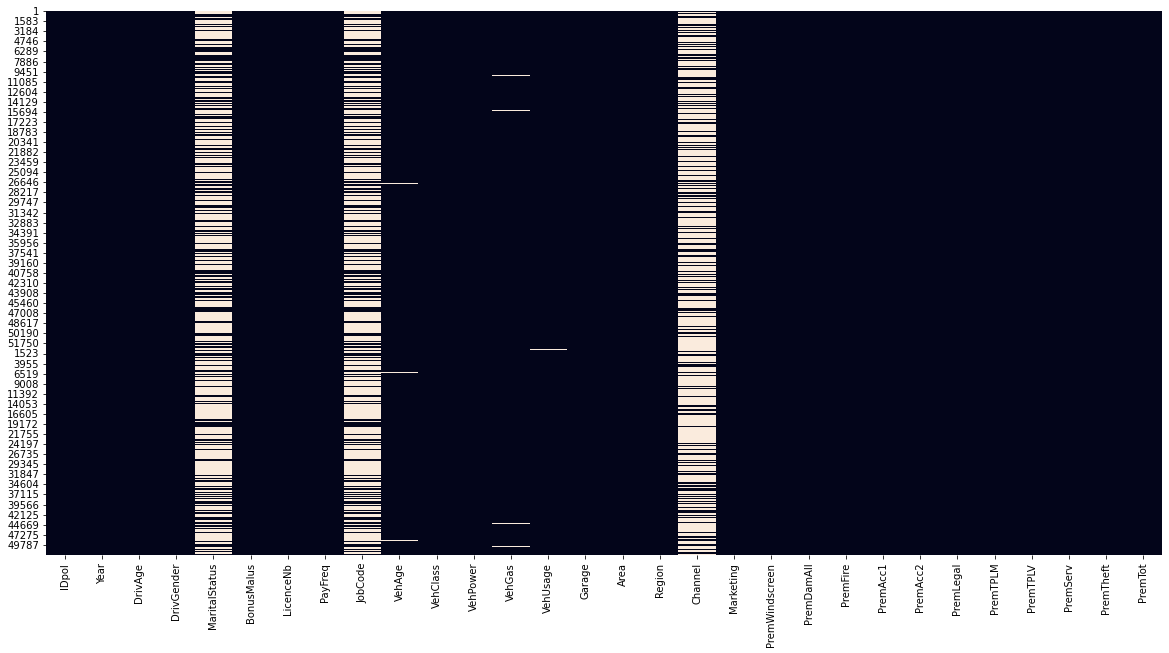

In [65]:
plt.figure(figsize=(20,10))
sns.heatmap(prem_v2.isna(),cbar=False)

on voit tout notre dataset avec toutes ses lignes et toutes ses colonnes. En blanc on voit là ou il y a les valeurs manquantes 
et en noir les positions dans les quelles on a ses valeurs.

In [66]:
(prem_v2.isna().sum()/prem_v2.shape[0]).sort_values(ascending=True) # le pourcentage de de chaque variable

IDpol             0.000000
PremServ          0.000000
PremTPLV          0.000000
PremTPLM          0.000000
PremLegal         0.000000
PremAcc2          0.000000
PremAcc1          0.000000
PremFire          0.000000
PremDamAll        0.000000
PremWindscreen    0.000000
Marketing         0.000000
Region            0.000000
Area              0.000000
PremTheft         0.000000
Garage            0.000000
VehClass          0.000000
PayFreq           0.000000
LicenceNb         0.000000
DrivGender        0.000000
DrivAge           0.000000
Year              0.000000
PremTot           0.000000
VehPower          0.000154
VehUsage          0.001251
VehGas            0.003138
BonusMalus        0.003388
VehAge            0.009337
JobCode           0.672737
MaritalStatus     0.672737
Channel           0.689121
dtype: float64

Dans notre dataset on supprime tous les variables qui ont un poucentage de données manquantes supérieur à 65%

##### Supression des variables 

Les variables 'JobCode', 'MaritalStatus' et 'Channel' ont respectivement des pourcentages
67%, 67% et 69% de valeurs manquantes.
Ce qui donne une non representativités de ces variable par rapport à la 
population totale.

In [67]:

prem_v2.drop(['MaritalStatus', 'JobCode', 'Channel'], axis = 1,inplace=True) # suppression d'une variable
# base.drop(columns =['SubGroup2']) 

In [68]:
prem_v2.isna().sum()

IDpol               0
Year                0
DrivAge             0
DrivGender          0
BonusMalus        176
LicenceNb           0
PayFreq             0
VehAge            485
VehClass            0
VehPower            8
VehGas            163
VehUsage           65
Garage              0
Area                0
Region              0
Marketing           0
PremWindscreen      0
PremDamAll          0
PremFire            0
PremAcc1            0
PremAcc2            0
PremLegal           0
PremTPLM            0
PremTPLV            0
PremServ            0
PremTheft           0
PremTot             0
dtype: int64

Les variables 'VehPower', 'VehUsage', 'VehGas', 'BonusMalus', et 'VehAge' avec respectivement 0.0154%, 0.125%, 0.313%,
0.338, et 0.933% ont de faible pourcentage de valeurs manquantes dans cette base. Ce qui montre qu'elles sont un poids significatif dans la base.
Donc la suppression des ces variables peuvent entrainer une perte d'information. De ce fait on peut remplir les valeurs manquantes par la moyenne ou la médiane des valeurs commues. 

##### Remplissage des NA variables quantitatives: BonusMalus, VehAge

In [69]:
prem_v2.BonusMalus = prem_v2.BonusMalus.fillna(prem_v2.BonusMalus.median()) # imputation des NA par la médian de la variable

In [70]:
prem_v2.BonusMalus.median()

57.0

In [71]:
prem_v2.VehAge = prem_v2.VehAge.fillna(prem_v2.VehAge.median()) 

In [72]:
prem_v2.VehAge.median()

7.0

##### Remplissage des NA variables qualitatives: VehGas, VehUsage, VehPower
Imputation par le mode

In [73]:
prem_v2[['VehGas','VehUsage']] # accès à plusieurs colonnes

,VehGas,VehUsage
1,Regular,Private+trip to office
2,Regular,Private+trip to office
4,Diesel,Private+trip to office
6,Regular,Private+trip to office
7,Regular,Private+trip to office
...,...,...
52351,Regular,Private+trip to office
52360,Diesel,Private+trip to office
52362,Regular,Private+trip to office
52368,Regular,Private+trip to office


In [74]:
prem_v2['VehGas'].value_counts() 

Regular    31229
Diesel     19478
Gazole      1073
Name: VehGas, dtype: int64

In [75]:
prem_v2['VehUsage'].value_counts() 

Private+trip to office    50364
Professional               1089
Professional run            425
Name: VehUsage, dtype: int64

In [76]:
pd.value_counts(prem_v2.VehGas) # ignore par défaut les NA

Regular    31229
Diesel     19478
Gazole      1073
Name: VehGas, dtype: int64

In [77]:
pd.value_counts(prem_v2.VehUsage) 

Private+trip to office    50364
Professional               1089
Professional run            425
Name: VehUsage, dtype: int64

In [78]:
prem_v2.VehGas.value_counts(dropna=False) # redonne la tableau de fréquence des modalités en tenant compte des NA

Regular    31229
Diesel     19478
Gazole      1073
NaN          163
Name: VehGas, dtype: int64

In [79]:
prem_v2.VehUsage.value_counts(dropna=False)  

Private+trip to office    50364
Professional               1089
Professional run            425
NaN                          65
Name: VehUsage, dtype: int64

In [80]:
prem_v2.VehPower.value_counts(dropna=False)

P10    9146
P12    8348
P11    8317
P9     6670
P13    6603
P8     5187
P14    3771
P15    1510
P7      945
P16     720
P5      597
P17      58
P4       46
P2       15
NaN       8
P6        2
Name: VehPower, dtype: int64

In [81]:
prem_v2.VehGas =prem_v2.VehGas.fillna(prem_v2.VehGas.mode()[0]) ; # imputation par le mode

In [82]:
prem_v2.VehUsage = prem_v2.VehUsage.fillna(prem_v2.VehUsage.mode()[0]) ;
prem_v2

,IDpol,Year,DrivAge,DrivGender,BonusMalus,LicenceNb,PayFreq,VehAge,VehClass,VehPower,...,PremDamAll,PremFire,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot
1,90139827.100b,2003,35,M,50.0,2,Annual,7.0,Cheapest,P8,...,86,2,0,0,7,78.9,4,53,29,269.9
2,60100432.10a,2003,31,M,85.0,1,Half-yearly,8.0,Cheaper,P12,...,0,7,36,0,15,310.0,16,51,81,549.0
4,90185953.100c,2003,60,M,50.0,4,Half-yearly,0.0,More expensive,P15,...,462,21,0,65,19,245.2,13,58,259,1218.2
6,90148556.100a,2003,34,F,57.0,2,Half-yearly,12.0,Cheapest,P8,...,0,2,32,0,7,89.5,5,57,26,230.5
7,90180705.100a,2003,26,M,100.0,1,Half-yearly,8.0,Cheap,P13,...,0,0,38,0,24,605.9,32,51,0,750.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52351,90134681.100b,2004,38,F,52.0,2,Annual,10.0,Cheapest,P9,...,78,2,0,44,5,69.4,4,53,25,290.4
52360,90194192.100a,2004,45,M,50.0,2,Annual,2.0,Cheaper,P11,...,139,4,33,0,10,118.8,6,50,38,412.8
52362,90132916.100a,2004,34,M,54.0,2,Annual,11.0,Cheapest,P11,...,0,0,31,0,8,101.5,5,50,0,210.5
52368,90134000.100a,2004,49,M,50.0,2,Half-yearly,9.0,Cheap,P13,...,0,3,0,0,7,85.3,5,51,30,208.3


In [83]:
prem_v2.VehPower = prem_v2.VehPower.fillna(prem_v2.VehPower.mode()[0])

###### Vérification 1

In [84]:

prem_v2.VehGas.value_counts(dropna=False)

Regular    31392
Diesel     19478
Gazole      1073
Name: VehGas, dtype: int64

In [85]:
prem_v2.VehUsage.value_counts(dropna=False) 

Private+trip to office    50429
Professional               1089
Professional run            425
Name: VehUsage, dtype: int64

In [86]:
prem_v2.VehPower.value_counts(dropna=False) 

P10    9154
P12    8348
P11    8317
P9     6670
P13    6603
P8     5187
P14    3771
P15    1510
P7      945
P16     720
P5      597
P17      58
P4       46
P2       15
P6        2
Name: VehPower, dtype: int64

###### Vérification 2

In [87]:
prem_v2.isna().sum()

IDpol             0
Year              0
DrivAge           0
DrivGender        0
BonusMalus        0
LicenceNb         0
PayFreq           0
VehAge            0
VehClass          0
VehPower          0
VehGas            0
VehUsage          0
Garage            0
Area              0
Region            0
Marketing         0
PremWindscreen    0
PremDamAll        0
PremFire          0
PremAcc1          0
PremAcc2          0
PremLegal         0
PremTPLM          0
PremTPLV          0
PremServ          0
PremTheft         0
PremTot           0
dtype: int64

### Gestion des Données Incohérentes (DI)

In [88]:
var = prem_v2.columns ; var

Index(['IDpol', 'Year', 'DrivAge', 'DrivGender', 'BonusMalus', 'LicenceNb',
       'PayFreq', 'VehAge', 'VehClass', 'VehPower', 'VehGas', 'VehUsage',
       'Garage', 'Area', 'Region', 'Marketing', 'PremWindscreen', 'PremDamAll',
       'PremFire', 'PremAcc1', 'PremAcc2', 'PremLegal', 'PremTPLM', 'PremTPLV',
       'PremServ', 'PremTheft', 'PremTot'],
      dtype='object')

In [89]:
prem_v2.dtypes

IDpol              object
Year                int64
DrivAge             int64
DrivGender         object
BonusMalus        float64
LicenceNb           int64
PayFreq            object
VehAge            float64
VehClass           object
VehPower           object
VehGas             object
VehUsage           object
Garage             object
Area               object
Region             object
Marketing          object
PremWindscreen      int64
PremDamAll          int64
PremFire            int64
PremAcc1            int64
PremAcc2            int64
PremLegal           int64
PremTPLM          float64
PremTPLV            int64
PremServ            int64
PremTheft           int64
PremTot           float64
dtype: object

#### Quantitatives

###### Year

In [90]:
prem_v2.Year.describe()

count    51943.000000
mean      2003.381745
std          0.485819
min       2003.000000
25%       2003.000000
50%       2003.000000
75%       2004.000000
max       2004.000000
Name: Year, dtype: float64

###### DrivAge

In [91]:
prem_v2.DrivAge.describe()

count    51943.000000
mean        39.851568
std         11.994423
min          1.000000
25%         31.000000
50%         38.000000
75%         47.000000
max        198.000000
Name: DrivAge, dtype: float64

In [92]:
prem_v2.DrivAge.value_counts().sort_index()  # Il des données incohérentes sur l'âge des conducteurs

1      1
3      1
5      1
7      3
9      1
      ..
162    1
180    1
185    1
188    1
198    1
Name: DrivAge, Length: 90, dtype: int64

In [93]:
prem_v2 = prem_v2[(prem_v2.DrivAge>=18)&(prem_v2.DrivAge<=100)] # selection des lignes cohérentes (supression des anomalies)

In [94]:
prem_v2[~(prem.DrivAge>=18)&(prem_v2.DrivAge<=100)].DrivAge = np.nan # imputation des incohérences par DM

C:\Users\Diop\AppData\Local\Temp\ipykernel_22244\1869906494.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  prem_v2[~(prem.DrivAge>=18)&(prem_v2.DrivAge<=100)].DrivAge = np.nan # imputation des incohérences par DM


In [95]:
prem_v2.DrivAge = prem_v2.DrivAge.fillna(prem_v2.DrivAge.median()) #imputation des DM par médiane

C:\Users\Diop\AppData\Local\Temp\ipykernel_22244\4127841268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prem_v2.DrivAge = prem_v2.DrivAge.fillna(prem_v2.DrivAge.median()) #imputation des DM par médiane


In [96]:
prem_v2.DrivAge.median()

38.0

###### Vérification

In [97]:
prem_v2.DrivAge.describe()

count    51922.000000
mean        39.834906
std         11.865296
min         18.000000
25%         31.000000
50%         38.000000
75%         47.000000
max         97.000000
Name: DrivAge, dtype: float64

###### BonusMalus

In [98]:
prem_v2.BonusMalus.describe()

count    51922.000000
mean        62.851681
std         15.189734
min         50.000000
25%         50.000000
50%         57.000000
75%         72.000000
max        156.000000
Name: BonusMalus, dtype: float64

###### VehAge

In [99]:
prem_v2.VehAge.describe()

count    51922.000000
mean         7.520396
std          4.753902
min          0.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         89.000000
Name: VehAge, dtype: float64

In [100]:
prem_v2.VehAge.value_counts().sort_index()

0.0     1695
1.0     2788
2.0     3300
3.0     3021
4.0     3485
5.0     4096
6.0     4247
7.0     5269
8.0     4505
9.0     4015
10.0    3354
11.0    2775
12.0    2304
13.0    1879
14.0    1574
15.0    1138
16.0     731
17.0     423
18.0     308
19.0     261
20.0     180
21.0     101
22.0      85
23.0      82
24.0      77
25.0      40
26.0      54
27.0      35
28.0      11
29.0      19
30.0      12
31.0       7
32.0       8
33.0       8
34.0       4
35.0       4
38.0       2
39.0       2
40.0       1
41.0       3
42.0       4
44.0       3
60.0       2
68.0       1
69.0       1
77.0       1
78.0       3
79.0       2
89.0       2
Name: VehAge, dtype: int64

#### Qualitatives

###### DrivGender

In [101]:

prem_v2.DrivGender

1        M
2        M
4        M
6        F
7        M
        ..
52351    F
52360    M
52362    M
52368    M
52369    M
Name: DrivGender, Length: 51922, dtype: object

In [102]:
prem_v2.DrivGender.describe()

count     51922
unique        5
top           M
freq      33666
Name: DrivGender, dtype: object

In [103]:
prem_v2.DrivGender.value_counts().sort_index() # incohérence sur l'uniformité de catégorisation
# F = Female et H = M = Male. il va falloir procéder à la correction/

F         17760
Female       24
H           431
M         33666
Male         41
Name: DrivGender, dtype: int64

In [104]:
prem_v2.DrivGender.replace({ "F":"Female","H": "Male","M":"Male"},inplace=True) # Imputation de modalités

C:\Users\Diop\AppData\Local\Temp\ipykernel_22244\3659178317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prem_v2.DrivGender.replace({ "F":"Female","H": "Male","M":"Male"},inplace=True) # Imputation de modalités


In [105]:
prem_v2 = prem_v2[prem_v2.DrivGender.isin(["Male","Female"])] # Selection des lignes

In [106]:
prem_v2.DrivGender.value_counts()

Male      34138
Female    17784
Name: DrivGender, dtype: int64

###### PayFreq

In [107]:
prem_v2.PayFreq

1             Annual
2        Half-yearly
4        Half-yearly
6        Half-yearly
7        Half-yearly
            ...     
52351         Annual
52360         Annual
52362         Annual
52368    Half-yearly
52369    Half-yearly
Name: PayFreq, Length: 51922, dtype: object

In [108]:
prem_v2.PayFreq.describe()

count           51922
unique              4
top       Half-yearly
freq            28961
Name: PayFreq, dtype: object

In [109]:
prem_v2.PayFreq.value_counts().sort_index()

Annual         17572
Half-yearly    28961
Monthly         1486
Quarterly       3903
Name: PayFreq, dtype: int64

###### VehClass

In [110]:
prem_v2.VehClass

1              Cheapest
2               Cheaper
4        More expensive
6              Cheapest
7                 Cheap
              ...      
52351          Cheapest
52360           Cheaper
52362          Cheapest
52368             Cheap
52369        Medium low
Name: VehClass, Length: 51922, dtype: object

In [111]:
prem_v2.VehClass.describe()

count        51922
unique           9
top       Cheapest
freq         17885
Name: VehClass, dtype: object

In [112]:
prem_v2.VehClass.value_counts().sort_index()

Cheap              9025
Cheaper           15165
Cheapest          17885
Expensive           577
Medium             2021
Medium high        1384
Medium low         5564
More expensive      220
Most expensive       81
Name: VehClass, dtype: int64

###### VehPower

In [113]:
prem_v2.VehPower.value_counts().sort_index()

P10    9150
P11    8316
P12    8342
P13    6602
P14    3770
P15    1509
P16     719
P17      58
P2       15
P4       46
P5      597
P6        2
P7      945
P8     5185
P9     6666
Name: VehPower, dtype: int64

###### VehGas

In [114]:
prem_v2.VehGas.value_counts().sort_index()

Diesel     19469
Gazole      1073
Regular    31380
Name: VehGas, dtype: int64

In [115]:
prem_v2.VehGas

1        Regular
2        Regular
4         Diesel
6        Regular
7        Regular
          ...   
52351    Regular
52360     Diesel
52362    Regular
52368    Regular
52369     Diesel
Name: VehGas, Length: 51922, dtype: object

In [116]:
prem_v2.VehGas.isna().sum()

0

###### VehUsage

In [117]:
prem_v2.VehUsage.value_counts().sort_index()

Private+trip to office    50409
Professional               1088
Professional run            425
Name: VehUsage, dtype: int64

###### Garage

In [118]:
prem_v2.Garage.value_counts()

Closed zbox                  26304
Closed collective parking     9815
Opened collective parking     8613
Street                        7190
Name: Garage, dtype: int64

###### Area

In [119]:
prem_v2.Area.value_counts()

A5     15102
A3     12690
A2      7407
A7      6876
A4      3774
A9      3397
A8      1929
A6       641
A10       72
A12       34
Name: Area, dtype: int64

###### Region

In [120]:
prem_v2.Region.value_counts()

Île-de-France                 7853
Hauts-de-France               6974
Bourgogne-Franche-Comté       6906
Pays de la Loire              6860
Auvergne-Rhône-Alpes          6730
Occitanie                     3442
Nouvelle-Aquitaine            3371
Bretagne                      1662
Corse                         1660
Centre-Val de Loire           1627
Provence-Alpes-Côte d'Azur    1624
Grand Est                     1614
Normandie                     1599
Name: Region, dtype: int64

###### Marketing

In [121]:
prem_v2.Marketing.value_counts()

M1    26304
M3     9815
M2     8613
M4     7190
Name: Marketing, dtype: int64

## Multivariées

In [122]:
for col in prem_v2:
    print([prem_v2[col].describe()]); # analyse des modalités des variables

[count             51922
unique            32114
top       90139827.100b
freq                  2
Name: IDpol, dtype: object]
[count    51922.000000
mean      2003.381746
std          0.485819
min       2003.000000
25%       2003.000000
50%       2003.000000
75%       2004.000000
max       2004.000000
Name: Year, dtype: float64]
[count    51922.000000
mean        39.834906
std         11.865296
min         18.000000
25%         31.000000
50%         38.000000
75%         47.000000
max         97.000000
Name: DrivAge, dtype: float64]
[count     51922
unique        2
top        Male
freq      34138
Name: DrivGender, dtype: object]
[count    51922.000000
mean        62.851681
std         15.189734
min         50.000000
25%         50.000000
50%         57.000000
75%         72.000000
max        156.000000
Name: BonusMalus, dtype: float64]
[count    51922.000000
mean         1.884750
std          0.666469
min          1.000000
25%          1.000000
50%          2.000000
75%          2.00000

In [123]:
for col in prem_v2:
    print(prem_v2[col].value_counts()); # analyse des modalités des variables

90139827.100b    2
80100224.101b    2
90179417.102a    2
90110876.10Aa    2
90169840.100b    2
                ..
90134905.101a    1
80200136.10a     1
90104129.103a    1
90106797.100a    1
90135324.101b    1
Name: IDpol, Length: 32114, dtype: int64
2003    32101
2004    19821
Name: Year, dtype: int64
32    2136
30    2097
31    2025
35    1986
33    1957
      ... 
80      14
86       7
85       7
97       2
96       1
Name: DrivAge, Length: 72, dtype: int64
Male      34138
Female    17784
Name: DrivGender, dtype: int64
50.0     19693
80.0      2506
85.0      2425
64.0      2385
60.0      2383
         ...  
108.0        2
120.0        2
126.0        1
89.0         1
99.0         1
Name: BonusMalus, Length: 68, dtype: int64
2    33278
1    13085
3     4225
4     1158
5      145
6       30
7        1
Name: LicenceNb, dtype: int64
Half-yearly    28961
Annual         17572
Quarterly       3903
Monthly         1486
Name: PayFreq, dtype: int64
7.0     5269
8.0     4505
6.0     4247
5.0    

In [124]:
base_premV2=prem_v2.copy()

# BASE SEV

In [125]:
sev.head()

,IDpol,OccurDate,Payment,IDclaim,Guarantee
0,90190300.100a,37788,73,201348,Windscreen
1,90179690.101a,38130,815,1202677,TPL
2,90157308.100b,38207,291,207876,Windscreen
3,90130925.100a,37948,56,209887,TPL
4,90161643.100a,38151,820,1201765,Theft


In [126]:
sev.shape

(9274, 5)

In [127]:
sev.size

46370

In [128]:
sev.dtypes

IDpol        object
OccurDate     int64
Payment      object
IDclaim       int64
Guarantee    object
dtype: object

In [129]:
sev.count()

IDpol        9274
OccurDate    9274
Payment      9274
IDclaim      9274
Guarantee    9274
dtype: int64

In [130]:
sev = base_sev.copy()

In [131]:
base_sev.head()

,IDpol,OccurDate,Payment,IDclaim,Guarantee
0,90190300.100a,37788,73,201348,Windscreen
1,90179690.101a,38130,815,1202677,TPL
2,90157308.100b,38207,291,207876,Windscreen
3,90130925.100a,37948,56,209887,TPL
4,90161643.100a,38151,820,1201765,Theft


In [132]:
import datetime

In [133]:
#sev['OccurDate']=pd.to_datetime(sev['OccurDate'], format="%d/%m/%Y")

In [134]:
sev['OccurDate']=pd.to_datetime(sev['OccurDate'], unit='D', origin='1900-01-01')
sev

,IDpol,OccurDate,Payment,IDclaim,Guarantee
0,90190300.100a,2003-06-18,73,201348,Windscreen
1,90179690.101a,2004-05-25,815,1202677,TPL
2,90157308.100b,2004-08-10,291,207876,Windscreen
3,90130925.100a,2003-11-25,56,209887,TPL
4,90161643.100a,2004-06-15,820,1201765,Theft
...,...,...,...,...,...
9269,70200083.10a,2004-12-21,0,8175,Fire
9270,90104151.100a,2003-12-11,765,209155,Windscreen
9271,90152336.100a,2004-06-21,222,1203137,Windscreen
9272,90158585.100a,2003-01-10,116,7685,Windscreen


In [135]:
sev.head()

,IDpol,OccurDate,Payment,IDclaim,Guarantee
0,90190300.100a,2003-06-18,73,201348,Windscreen
1,90179690.101a,2004-05-25,815,1202677,TPL
2,90157308.100b,2004-08-10,291,207876,Windscreen
3,90130925.100a,2003-11-25,56,209887,TPL
4,90161643.100a,2004-06-15,820,1201765,Theft


In [136]:
#sum(sev["IDpol"].duplicated())

In [137]:
sev.Guarantee.unique()

array(['Windscreen', 'TPL', 'Theft', 'Damage', 'Other', 'Fire'],
      dtype=object)

In [138]:
#sev['OccurDate']=pd.to_datetime(sev['OccurDate'])

on note que il n'y a pas de valeurs manquantes dans cette base.

# 2- Jointure des Bases et Gestion des Rapprochements

In [139]:
freq.head()

,IDpol,Year,Damage,Fire,Other,Theft,TPL,Windscreen
0,90122963.101a,2003,0,0,-1,0,0,0
1,90185196.100a,2003,0,0,-1,0,0,0
2,90111450.102a,2003,0,0,0,0,0,1
3,90156025.100a,2003,0,0,-1,0,0,0
4,90181462.101b,2003,0,0,-1,0,0,0


In [140]:
prem_v2.shape

(51922, 27)

In [141]:
sev.shape

(9274, 5)

## Test merge

In [142]:
freq_copy=freq.copy(); freq.shape

(64195, 8)

In [143]:
premv2_copy=prem_v2.copy(); premv2_copy.shape

(51922, 27)

In [144]:
sev_copy=sev.copy(); sev_copy.shape

(9274, 5)

In [150]:
prem_v2.head()

,IDpol,Year,DrivAge,DrivGender,BonusMalus,LicenceNb,PayFreq,VehAge,VehClass,VehPower,...,PremDamAll,PremFire,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot
1,90139827.100b,2003,35,Male,50.0,2,Annual,7.0,Cheapest,P8,...,86,2,0,0,7,78.9,4,53,29,269.9
2,60100432.10a,2003,31,Male,85.0,1,Half-yearly,8.0,Cheaper,P12,...,0,7,36,0,15,310.0,16,51,81,549.0
4,90185953.100c,2003,60,Male,50.0,4,Half-yearly,0.0,More expensive,P15,...,462,21,0,65,19,245.2,13,58,259,1218.2
6,90148556.100a,2003,34,Female,57.0,2,Half-yearly,12.0,Cheapest,P8,...,0,2,32,0,7,89.5,5,57,26,230.5
7,90180705.100a,2003,26,Male,100.0,1,Half-yearly,8.0,Cheap,P13,...,0,0,38,0,24,605.9,32,51,0,750.9


# Jointure entre les base freq et prem et sev

In [151]:
prem_freq_merge =pd.merge(freq,prem_v2,on=['IDpol', 'Year']);prem_freq_merge

,IDpol,Year,Damage,Fire,Other,Theft,TPL,Windscreen,DrivAge,DrivGender,...,PremDamAll,PremFire,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot
0,90122963.101a,2003,0,0,-1,0,0,0,47,Male,...,0,4,0,0,12,254.9,14,60,43,408.9
1,90185196.100a,2003,0,0,-1,0,0,0,45,Male,...,321,11,0,0,14,206.3,11,55,132,833.3
2,90111450.102a,2003,0,0,0,0,0,1,44,Male,...,0,12,39,0,13,241.3,13,60,94,561.3
3,90156025.100a,2003,0,0,-1,0,0,0,47,Female,...,0,0,28,0,5,63.7,4,51,0,161.7
4,90181462.101b,2003,0,0,-1,0,0,0,47,Male,...,172,8,0,0,13,157.7,8,53,77,525.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51887,90151835.100b,2004,0,0,0,0,0,0,42,Male,...,292,12,41,0,16,204.8,11,58,133,835.8
51888,90140082.100a,2004,0,0,0,0,0,0,44,Female,...,92,3,0,0,8,91.8,5,52,23,290.8
51889,90112567.101a,2003,0,0,0,0,0,0,51,Male,...,185,8,0,0,8,121.0,6,46,99,518.0
51890,90126359.102b,2003,0,0,0,0,1,0,34,Male,...,160,6,34,0,11,155.5,8,52,65,512.5


In [154]:
base_sev1 = pd.read_csv("db_sev.csv", sep=";",decimal=".")# Import d'un fichier texte

In [155]:
prem_freq_sev_merge =pd.merge(prem_freq_merge,base_sev1,on=['IDpol']);prem_freq_sev_merge

,IDpol,Year,Damage,Fire,Other,Theft,TPL,Windscreen,DrivAge,DrivGender,...,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot,OccurDate,Payment,IDclaim,Guarantee,nb_sin
0,90122963.101a,2003,0,0,-1,0,0,0,47,Male,...,254.9,14,60,43,408.9,2004,915,1206705,TPL,1
1,90185196.100a,2003,0,0,-1,0,0,0,45,Male,...,206.3,11,55,132,833.3,2004,897,202699,TPL,1
2,90111450.102a,2003,0,0,0,0,0,1,44,Male,...,241.3,13,60,94,561.3,2003,274,202821,Windscreen,2
3,90111450.102a,2003,0,0,0,0,0,1,44,Male,...,241.3,13,60,94,561.3,2004,280,1202821,Windscreen,2
4,90111450.102a,2004,0,0,0,0,0,1,44,Male,...,221.4,12,55,86,515.4,2003,274,202821,Windscreen,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15982,90108741.101a,2003,0,0,0,0,0,0,49,Male,...,83.2,5,57,21,264.2,2004,3286,10834,Fire,1
15983,90148232.100a,2003,1,0,0,0,0,0,39,Male,...,177.1,9,62,44,466.1,2004,350,10822,Windscreen,2
15984,90148232.100a,2003,1,0,0,0,0,0,39,Male,...,177.1,9,62,44,466.1,2003,2851,8708,Damage,2
15985,90159936.100a,2003,0,0,0,0,0,1,75,Male,...,115.6,6,54,49,263.6,2003,64,7167,Windscreen,1


In [156]:
#freq_prem_v2 = pd.concat([freq, base_premV2], axis=1, join='inner')
#freq_prem_v2.shape

# TELECHARGEMENT DE LA BASE     * freq_prem_v2*

In [159]:
base_premV2.to_csv("base_premV2.csv",sep = ";",index=False) 

In [160]:
freq.to_csv("freq.csv",sep = ";",index=False) 

In [161]:
prem_freq_merge.to_csv("prem_freq_merge.csv",sep = ";",index=False) 

In [162]:
prem_freq_sev_merge.to_csv("prem_freq_sev_merge.csv",sep = ";",index=False) 

In [163]:
prem_freq_merge = pd.read_csv("prem_freq_merge.csv", sep=";", decimal=".") ; prem_freq_merge.head()

,IDpol,Year,Damage,Fire,Other,Theft,TPL,Windscreen,DrivAge,DrivGender,...,PremDamAll,PremFire,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot
0,90122963.101a,2003,0,0,-1,0,0,0,47,Male,...,0,4,0,0,12,254.9,14,60,43,408.9
1,90185196.100a,2003,0,0,-1,0,0,0,45,Male,...,321,11,0,0,14,206.3,11,55,132,833.3
2,90111450.102a,2003,0,0,0,0,0,1,44,Male,...,0,12,39,0,13,241.3,13,60,94,561.3
3,90156025.100a,2003,0,0,-1,0,0,0,47,Female,...,0,0,28,0,5,63.7,4,51,0,161.7
4,90181462.101b,2003,0,0,-1,0,0,0,47,Male,...,172,8,0,0,13,157.7,8,53,77,525.7


In [164]:
prem_freq_sev_merge = pd.read_csv("prem_freq_sev_merge.csv", sep=";", decimal=".") ; prem_freq_sev_merge.head()

,IDpol,Year,Damage,Fire,Other,Theft,TPL,Windscreen,DrivAge,DrivGender,...,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot,OccurDate,Payment,IDclaim,Guarantee,nb_sin
0,90122963.101a,2003,0,0,-1,0,0,0,47,Male,...,254.9,14,60,43,408.9,2004,915,1206705,TPL,1
1,90185196.100a,2003,0,0,-1,0,0,0,45,Male,...,206.3,11,55,132,833.3,2004,897,202699,TPL,1
2,90111450.102a,2003,0,0,0,0,0,1,44,Male,...,241.3,13,60,94,561.3,2003,274,202821,Windscreen,2
3,90111450.102a,2003,0,0,0,0,0,1,44,Male,...,241.3,13,60,94,561.3,2004,280,1202821,Windscreen,2
4,90111450.102a,2004,0,0,0,0,0,1,44,Male,...,221.4,12,55,86,515.4,2003,274,202821,Windscreen,2


# 3- Analyse descriptive des données

In [165]:
prem_freq_merge.dtypes

IDpol              object
Year                int64
Damage              int64
Fire                int64
Other               int64
Theft               int64
TPL                 int64
Windscreen          int64
DrivAge             int64
DrivGender         object
BonusMalus        float64
LicenceNb           int64
PayFreq            object
VehAge            float64
VehClass           object
VehPower           object
VehGas             object
VehUsage           object
Garage             object
Area               object
Region             object
Marketing          object
PremWindscreen      int64
PremDamAll          int64
PremFire            int64
PremAcc1            int64
PremAcc2            int64
PremLegal           int64
PremTPLM          float64
PremTPLV            int64
PremServ            int64
PremTheft           int64
PremTot           float64
dtype: object

## Univariée

### Construire l'histogramme de la variable DrivAge

In [166]:
prem_freq_merge.DrivAge.describe()

count    51892.000000
mean        39.835639
std         11.866184
min         18.000000
25%         31.000000
50%         38.000000
75%         47.000000
max         97.000000
Name: DrivAge, dtype: float64

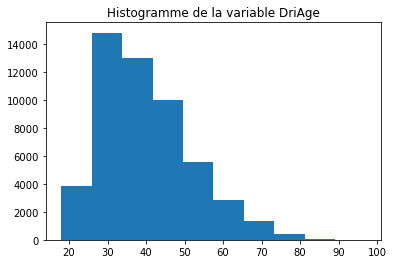

In [167]:
plt.hist(prem_freq_merge.DrivAge)
plt.title('Histogramme de la variable DriAge')
plt.show()

### construction du graphique camembert de la varible DrivGender

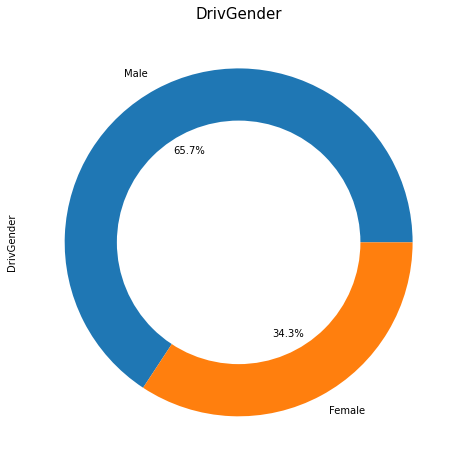

In [168]:
plt.figure(figsize=(8,8))

prem_freq_merge.DrivGender.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('DrivGender',fontsize='15')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

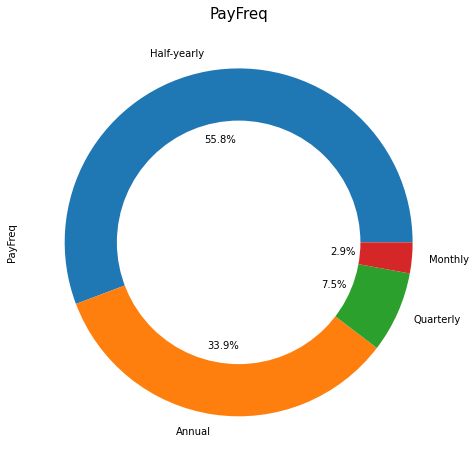

In [169]:
plt.figure(figsize=(8,8))

prem_freq_merge.PayFreq.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('PayFreq',fontsize='15')
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

C:\Users\Diop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Graphique de la variable VehClass')

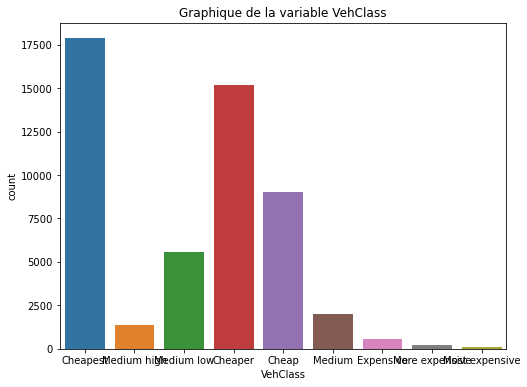

In [170]:
plt.figure(figsize=(8,6))
sns.countplot(prem_freq_merge['VehClass'])
plt.title('Graphique de la variable VehClass')

C:\Users\Diop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Graphique de la variable VehPower')

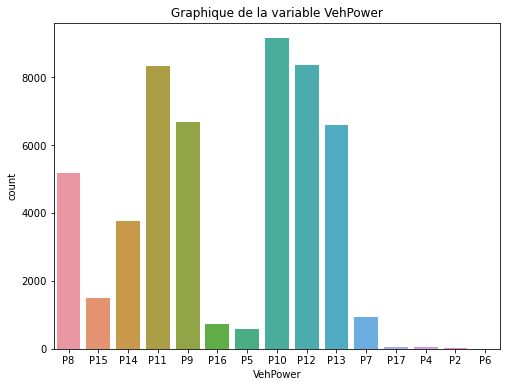

In [171]:
plt.figure(figsize=(8,6))
sns.countplot(prem_freq_merge['VehPower'])
plt.title('Graphique de la variable VehPower')

C:\Users\Diop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Graphique de la variable VehGas')

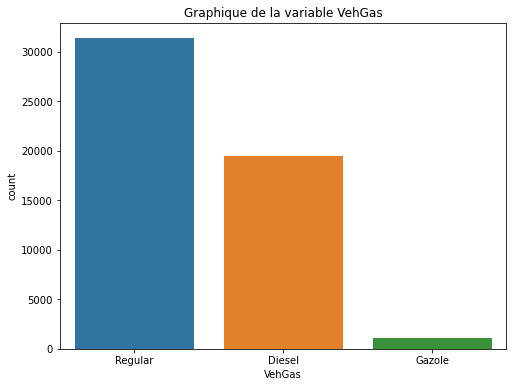

In [172]:
plt.figure(figsize=(8,6))
sns.countplot(prem_freq_merge['VehGas'])
plt.title('Graphique de la variable VehGas')

C:\Users\Diop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Graphique de la variable VehUsage')

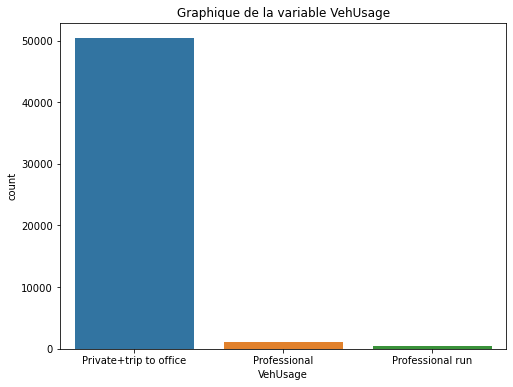

In [173]:
plt.figure(figsize=(8,6))
sns.countplot(prem_freq_merge['VehUsage'])
plt.title('Graphique de la variable VehUsage')

C:\Users\Diop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Graphique de la variable Garage')

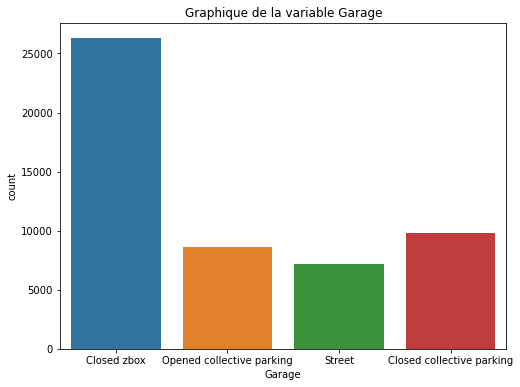

In [174]:
plt.figure(figsize=(8,6))
sns.countplot(prem_freq_merge['Garage'])
plt.title('Graphique de la variable Garage')

C:\Users\Diop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Graphique de la variable Region')

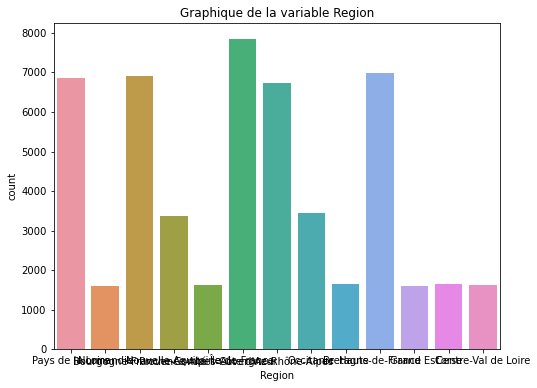

In [175]:
plt.figure(figsize=(8,6))
sns.countplot(prem_freq_merge['Region'])
plt.title('Graphique de la variable Region')


C:\Users\Diop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Graphique de la variable Area')

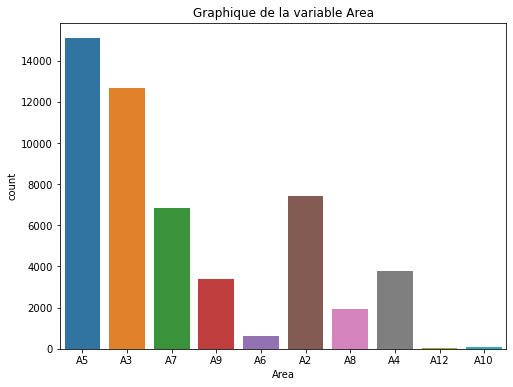

In [176]:
plt.figure(figsize=(8,6))
sns.countplot(prem_freq_merge['Area'])
plt.title('Graphique de la variable Area')


C:\Users\Diop\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Graphique de la variable Area')

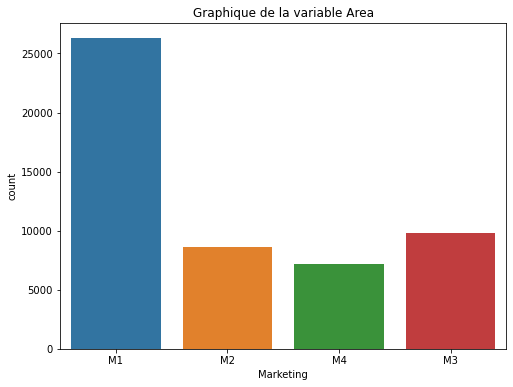

In [177]:
plt.figure(figsize=(8,6))
sns.countplot(prem_freq_merge['Marketing'])
plt.title('Graphique de la variable Area')


on constate que dans notre base de données 66% des conducteurs sont des hommes 

### Statistique descriptive de la base

In [178]:
round(prem_freq_merge.mean(),2) # donne la stat de toutes les variables de la base ...

C:\Users\Diop\AppData\Local\Temp\ipykernel_22244\2576045343.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  round(prem_freq_merge.mean(),2) # donne la stat de toutes les variables de la base ...


Year              2003.38
Damage               0.02
Fire                 0.00
Other                0.00
Theft                0.01
TPL                  0.07
Windscreen           0.05
DrivAge             39.84
BonusMalus          62.85
LicenceNb            1.88
VehAge               7.52
PremWindscreen      25.78
PremDamAll          83.06
PremFire             4.42
PremAcc1            12.95
PremAcc2            15.41
PremLegal           10.43
PremTPLM           167.74
PremTPLV             8.57
PremServ            53.77
PremTheft           46.58
PremTot            428.70
dtype: float64

In [179]:
prem_freq_merge.DrivGender.describe() # permet d'avoir les principales stat des de la variable

count     51892
unique        2
top        Male
freq      34117
Name: DrivGender, dtype: object

In [180]:
#prem_freq_merge.describe(include='all')# permet de faire la description de toute la base

In [181]:
prem_freq_merge.dtypes

IDpol              object
Year                int64
Damage              int64
Fire                int64
Other               int64
Theft               int64
TPL                 int64
Windscreen          int64
DrivAge             int64
DrivGender         object
BonusMalus        float64
LicenceNb           int64
PayFreq            object
VehAge            float64
VehClass           object
VehPower           object
VehGas             object
VehUsage           object
Garage             object
Area               object
Region             object
Marketing          object
PremWindscreen      int64
PremDamAll          int64
PremFire            int64
PremAcc1            int64
PremAcc2            int64
PremLegal           int64
PremTPLM          float64
PremTPLV            int64
PremServ            int64
PremTheft           int64
PremTot           float64
dtype: object

###  Définir une fonction permettant, pour une variable donnée, d’obtenir le tableau de contingence (ou stat des) et l’histogramme

In [182]:
def stat_des(var):
    if (prem_freq_merge[var].dtypes in ("object","int64")):
        freq = pd.value_counts(prem_freq_merge[var])
        print(freq.sort_index())
        modal = freq.index
        freqAbs = freq.values
        plt.bar(modal, freqAbs)
        print(prem_freq_merge[var].describe()) 
    else:
        print(prem_freq_merge[var].describe(include='all'))
        prem_freq_merge[var].hist(bins=80)
        return "Analyse de " + var

Female    17775
Male      34117
Name: DrivGender, dtype: int64
count     51892
unique        2
top        Male
freq      34117
Name: DrivGender, dtype: object


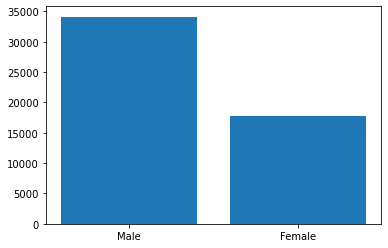

In [183]:
stat_des("DrivGender")

18     22
19     51
20    186
21    304
22    551
     ... 
85      7
86      7
87     14
96      1
97      2
Name: DrivAge, Length: 72, dtype: int64
count    51892.000000
mean        39.835639
std         11.866184
min         18.000000
25%         31.000000
50%         38.000000
75%         47.000000
max         97.000000
Name: DrivAge, dtype: float64


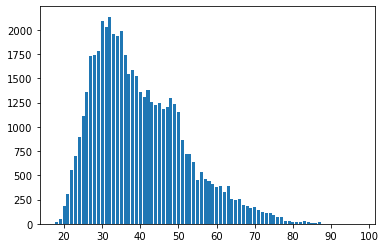

In [184]:
stat_des("DrivAge")

count    51892.000000
mean        62.851017
std         15.188632
min         50.000000
25%         50.000000
50%         57.000000
75%         72.000000
max        156.000000
Name: BonusMalus, dtype: float64


'Analyse de BonusMalus'

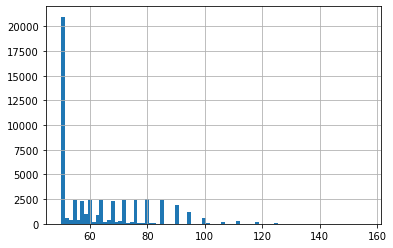

In [185]:
stat_des("BonusMalus")

P10    9143
P11    8310
P12    8342
P13    6595
P14    3770
P15    1507
P16     719
P17      58
P2       15
P4       46
P5      597
P6        2
P7      945
P8     5182
P9     6661
Name: VehPower, dtype: int64
count     51892
unique       15
top         P10
freq       9143
Name: VehPower, dtype: object


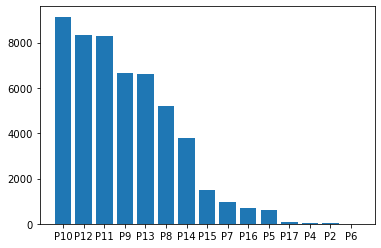

In [186]:
stat_des("VehPower")

Cheap              9022
Cheaper           15157
Cheapest          17872
Expensive           577
Medium             2019
Medium high        1382
Medium low         5562
More expensive      220
Most expensive       81
Name: VehClass, dtype: int64
count        51892
unique           9
top       Cheapest
freq         17872
Name: VehClass, dtype: object


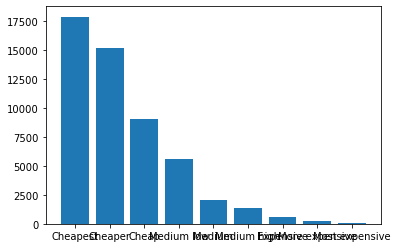

In [187]:
stat_des("VehClass")

Diesel     19465
Gazole      1073
Regular    31354
Name: VehGas, dtype: int64
count       51892
unique          3
top       Regular
freq        31354
Name: VehGas, dtype: object


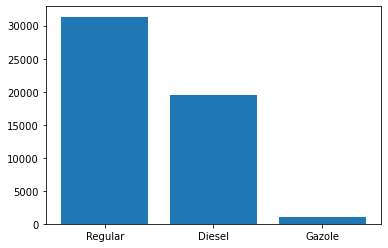

In [188]:
stat_des("VehGas")

Private+trip to office    50379
Professional               1088
Professional run            425
Name: VehUsage, dtype: int64
count                      51892
unique                         3
top       Private+trip to office
freq                       50379
Name: VehUsage, dtype: object


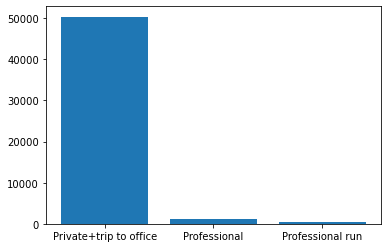

In [189]:
stat_des("VehUsage")

Auvergne-Rhône-Alpes          6730
Bourgogne-Franche-Comté       6906
Bretagne                      1659
Centre-Val de Loire           1621
Corse                         1655
Grand Est                     1610
Hauts-de-France               6974
Normandie                     1594
Nouvelle-Aquitaine            3371
Occitanie                     3442
Pays de la Loire              6860
Provence-Alpes-Côte d'Azur    1617
Île-de-France                 7853
Name: Region, dtype: int64
count             51892
unique               13
top       Île-de-France
freq               7853
Name: Region, dtype: object


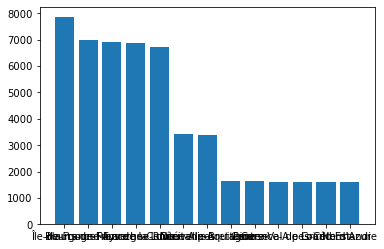

In [190]:
stat_des("Region")

In [192]:
prem_freq_merge[prem_freq_merge['Region']=='Île-de-France']

,IDpol,Year,Damage,Fire,Other,Theft,TPL,Windscreen,DrivAge,DrivGender,...,PremDamAll,PremFire,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot
6,90132151.100a,2004,0,0,-1,0,0,0,64,Male,...,180,7,0,0,10,118.8,6,47,68,469.8
7,90132095.101b,2004,0,0,-1,0,0,0,35,Male,...,144,5,0,49,8,110.6,5,56,48,460.6
9,90152472.100b,2003,0,0,-1,0,0,0,40,Male,...,0,20,39,0,18,220.3,12,52,220,643.3
12,90161577.100b,2004,0,0,-1,0,0,0,35,Male,...,0,0,0,55,12,229.6,12,57,0,365.6
14,90132488.100a,2004,1,0,0,0,0,0,30,Male,...,0,2,0,0,7,94.0,5,49,19,186.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51850,40100186.101a,2004,0,0,0,0,0,0,31,Female,...,0,7,35,0,10,200.1,11,56,71,423.1
51862,90134598.101a,2003,0,0,0,0,0,0,36,Female,...,63,3,0,47,8,97.2,5,52,29,314.2
51872,90155894.100a,2003,0,0,0,0,0,0,39,Male,...,266,8,0,55,12,223.6,12,52,82,756.6
51877,90160071.100b,2004,0,0,0,0,0,0,28,Male,...,153,4,0,57,11,150.6,8,59,48,511.6


1    13076
2    33259
3     4223
4     1158
5      145
6       30
7        1
Name: LicenceNb, dtype: int64
count    51892.000000
mean         1.884818
std          0.666521
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          7.000000
Name: LicenceNb, dtype: float64


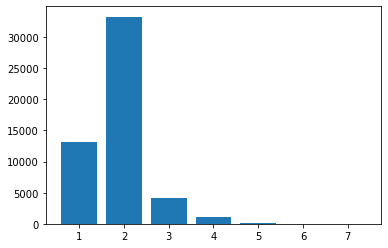

In [193]:
stat_des("LicenceNb")

## Multivariée

### Donner age moyens des conducteurs par sexe

In [194]:
round(prem_freq_merge.groupby(['DrivGender']).DrivAge.mean(),1) # via les propriétés de la dataframe

DrivGender
Female    38.2
Male      40.7
Name: DrivAge, dtype: float64

### Boite à Moustache de l'age du conducteurs par sexe 

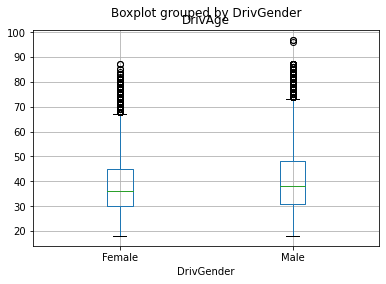

In [195]:
prem_freq_merge.boxplot(column='DrivAge',by='DrivGender') # via la dataframe
plt.show()

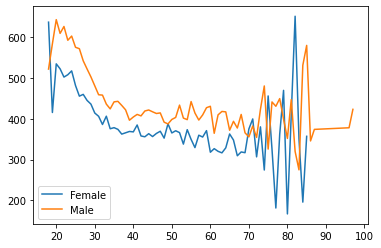

In [196]:
CS_moy_Age = pd.crosstab(prem_freq_merge['DrivAge'], prem_freq_merge['DrivGender'], values=prem_freq_merge.PremTot, aggfunc=np.mean)
plt.plot(CS_moy_Age.index,CS_moy_Age.iloc[:,0],label=CS_moy_Age.columns[0])
plt.plot(CS_moy_Age.index,CS_moy_Age.iloc[:,1],label=CS_moy_Age.columns[1]) 
plt.legend()

In [197]:
# Calculer le nombre de cas graves moyen par âge et par sexe du conducteur

pd.crosstab(prem_freq_merge['DrivAge'], prem_freq_merge['DrivGender'], values=prem_freq_merge.PremTot,
            aggfunc=pd.Series.mean)

DrivGender,Female,Male
DrivAge,,
18,636.875000,521.905556
19,415.535294,583.958824
20,534.718333,643.085714
21,522.523140,609.353005
22,502.346262,626.314243
...,...,...
85,357.150000,579.960000
86,NaN,345.842857
87,240.850000,374.133333


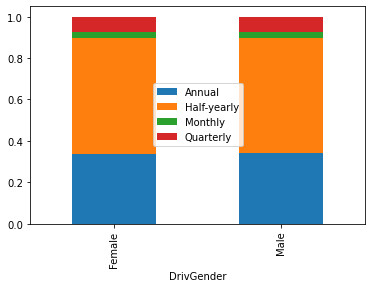

In [198]:
freqDrviGenderType = pd.crosstab(prem_freq_merge.DrivGender, prem_freq_merge.PayFreq,normalize="index")
freqDrviGenderType.plot.bar(stacked = True)
plt.legend(loc="center")
plt.show()

corrMatt = freq.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

<AxesSubplot:>

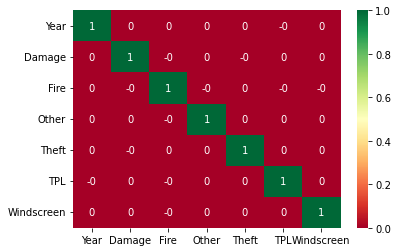

In [199]:
sns.heatmap(round(freq.corr(method='kendall'),1), annot=True, cmap="RdYlGn") # heatmap via sns

<AxesSubplot:>

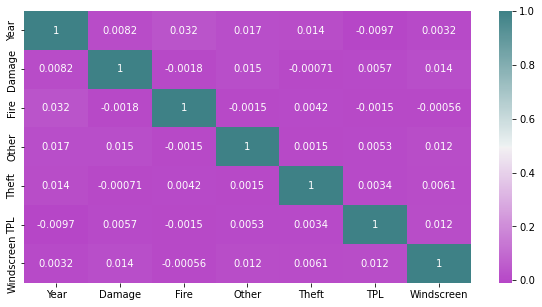

In [200]:
corr = freq.iloc[:, :8].corr()
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(2100,200,as_cmap=True), ax=ax)


## Econometrie et Machine Learning

In [201]:
def rule(x):
    if x == 'Male':
         return 0
    else:
         return 1
prem_freq_merge['Cat_sexe'] = prem_freq_merge.apply(lambda x: rule(x['DrivGender']), axis =  1)

## Sélectionner les colonnes catégorielles

In [202]:

cat_df = prem_freq_merge.select_dtypes(include=['object'])



## Sélectionner les colonnes numériques

In [271]:
num_df = prem_freq_merge.select_dtypes(include=['int', 'float'])

In [203]:
# Initialiser les listes pour les variables catégorielles et numériques
cat_df = []
num_df = []

# Boucler sur les colonnes et les ajouter aux listes appropriées
for col in prem_freq_merge.columns:
    if prem_freq_merge[col].dtype == 'object':
        cat_df.append(col)
    else:
        num_df.append(col)

In [204]:
# Créer des dataframes distinctes pour les variables catégorielles et numériques
cat_df = prem_freq_merge[cat_df]
cat_df

,IDpol,DrivGender,PayFreq,VehClass,VehPower,VehGas,VehUsage,Garage,Area,Region,Marketing
0,90122963.101a,Male,Half-yearly,Cheapest,P8,Regular,Private+trip to office,Closed zbox,A5,Pays de la Loire,M1
1,90185196.100a,Male,Half-yearly,Medium high,P15,Diesel,Private+trip to office,Closed zbox,A3,Normandie,M1
2,90111450.102a,Male,Quarterly,Medium low,P14,Diesel,Private+trip to office,Closed zbox,A3,Bourgogne-Franche-Comté,M1
3,90156025.100a,Female,Half-yearly,Cheapest,P8,Regular,Private+trip to office,Opened collective parking,A3,Nouvelle-Aquitaine,M2
4,90181462.101b,Male,Annual,Medium low,P14,Diesel,Private+trip to office,Closed zbox,A3,Provence-Alpes-Côte d'Azur,M1
...,...,...,...,...,...,...,...,...,...,...,...
51887,90151835.100b,Male,Half-yearly,Medium high,P14,Diesel,Private+trip to office,Closed zbox,A9,Grand Est,M1
51888,90140082.100a,Female,Half-yearly,Cheaper,P11,Regular,Private+trip to office,Closed zbox,A2,Pays de la Loire,M1
51889,90112567.101a,Male,Annual,Medium low,P14,Diesel,Private+trip to office,Closed collective parking,A3,Provence-Alpes-Côte d'Azur,M3
51890,90126359.102b,Male,Half-yearly,Cheaper,P12,Diesel,Private+trip to office,Closed zbox,A5,Bourgogne-Franche-Comté,M1


In [205]:
num_df = prem_freq_merge[num_df]
num_df

,Year,Damage,Fire,Other,Theft,TPL,Windscreen,DrivAge,BonusMalus,LicenceNb,...,PremFire,PremAcc1,PremAcc2,PremLegal,PremTPLM,PremTPLV,PremServ,PremTheft,PremTot,Cat_sexe
0,2003,0,0,-1,0,0,0,47,85.0,1,...,4,0,0,12,254.9,14,60,43,408.9,0
1,2003,0,0,-1,0,0,0,45,58.0,3,...,11,0,0,14,206.3,11,55,132,833.3,0
2,2003,0,0,0,0,0,1,44,72.0,1,...,12,39,0,13,241.3,13,60,94,561.3,0
3,2003,0,0,-1,0,0,0,47,54.0,2,...,0,28,0,5,63.7,4,51,0,161.7,1
4,2003,0,0,-1,0,0,0,47,50.0,2,...,8,0,0,13,157.7,8,53,77,525.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51887,2004,0,0,0,0,0,0,42,50.0,2,...,12,41,0,16,204.8,11,58,133,835.8,0
51888,2004,0,0,0,0,0,0,44,50.0,2,...,3,0,0,8,91.8,5,52,23,290.8,1
51889,2003,0,0,0,0,0,0,51,62.0,2,...,8,0,0,8,121.0,6,46,99,518.0,0
51890,2003,0,0,0,0,1,0,34,60.0,2,...,6,34,0,11,155.5,8,52,65,512.5,0


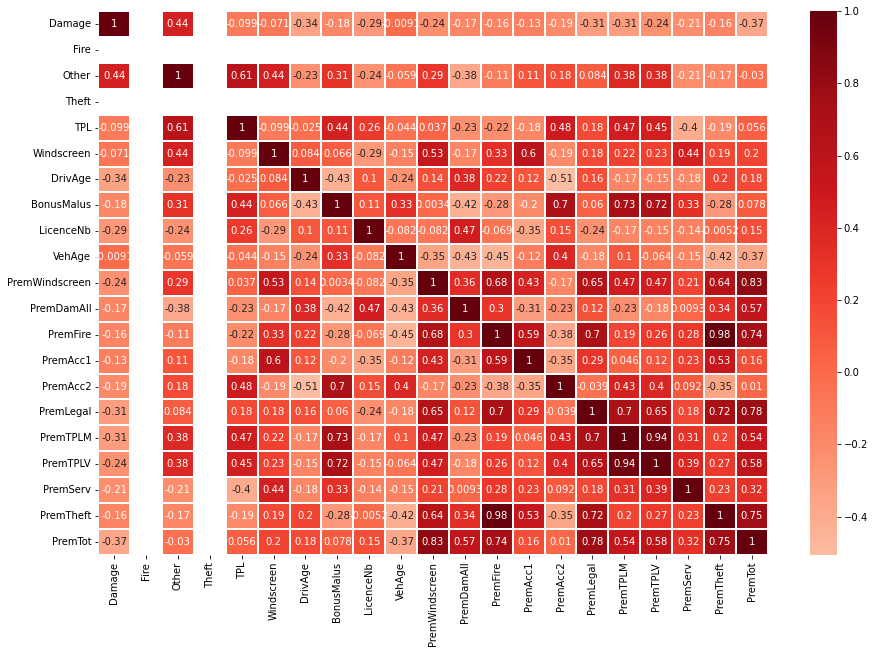

In [206]:
df1 = num_df.head(15)
plt.figure(figsize=(15,10))
sns.heatmap(df1[list(df1.columns[1:22])].corr(), 
            annot=True,
            linewidths=.4,
            center=0,
            cmap="Reds")
plt.show()

In [207]:
df = num_df.drop(['Damage','Fire', 'Theft','Other' , ], axis = 1)

In [209]:
granularité = ['DrivAge','Cat_sexe']
agreg_df = pd.pivot_table(df, 
                            values=['TPL','Windscreen','BonusMalus','LicenceNb','VehAge','PremTPLV',
                                    'PremWindscreen', 'PremDamAll','PremFire','PremAcc1', 
                                    'PremAcc2','PremLegal', 'PremTPLM','PremServ','PremTheft', 'PremTot',], 
                            index=granularité, 
                            aggfunc=np.mean)

In [210]:
agreg_df

BonusMalus  LicenceNb   PremAcc1   PremAcc2  PremDamAll  \
DrivAge Cat_sexe                                                            
18      0          89.277778   1.833333  18.500000  16.166667    0.000000   
        1          78.500000   1.750000   0.000000  27.000000    0.000000   
19      0          93.852941   1.852941   8.852941  25.911765   19.441176   
        1          88.764706   2.588235  12.588235  11.882353   14.882353   
20      0          87.555556   2.301587  13.801587  19.769841   32.000000   
...                      ...        ...        ...        ...         ...   
86      0          53.571429   1.428571  29.285714   0.000000   74.428571   
87      0          62.500000   1.666667  28.833333   0.000000   74.250000   
        1          50.000000   1.000000   0.000000  48.000000    0.000000   
96      0          50.000000   1.000000   0.000000   0.000000    0.000000   
97      0          50.000000   1.000000   0.000000   0.000000    0.000000   

                  PremFire  PremLegal   PremServ    PremTPLM   PremTPLV  \
DrivAge Cat_sexe                                                          
18      0         0.777778  15.000000  54.277778  377.683333  16.666667   
        1         1.750000  18.250000  54.500000  451.875000  24.000000   
19      0         0.470588  17.294118  54.000000  419.488235  19.294118   
        1         1.117647  11.294118  54.117647  267.005882  14.117647   
20      0         2.880952  17.523810  54.428571  420.784127  21.746032   
...                    ...        ...        ...         ...        ...   
86      0         3.142857   9.285714  52.571429  120.271429   6.285714   
87      0         1.833333  10.166667  55.166667  160.050000   8.333333   
        1         0.000000   9.500000  50.000000  117.350000   6.500000   
96      0         0.000000  24.000000  41.000000  298.100000  15.000000   
97      0         0.000000  26.000000  44.000000  335.250000  18.000000   

                  PremTheft     PremTot  PremWindscreen       TPL     VehAge  \
DrivAge Cat_sexe                                                               
18      0         10.222222  521.905556       12.611111  0.111111  12.055556   
        1         20.000000  636.875000       39.500000  0.000000   7.750000   
19      0          5.235294  583.958824       13.970588  0.058824  11.264706   
        1         12.294118  415.535294       16.235294  0.000000  11.411765   
20      0         32.587302  643.085714       27.563492  0.063492   9.039683   
...                     ...         ...             ...       ...        ...   
86      0         29.285714  345.842857       21.285714  0.000000   7.714286   
87      0         19.333333  374.133333       16.166667  0.083333  12.000000   
        1          0.000000  240.850000        9.500000  0.500000  13.000000   
96      0          0.000000  378.100000        0.000000  0.000000   1.000000   
97      0          0.000000  423.250000        0.000000  0.000000   2.000000   

                  Windscreen  
DrivAge Cat_sexe              
18      0           0.055556  
        1           0.000000  
19      0           0.000000  
        1           0.000000  
20      0           0.087302  
...                      ...  
86      0           0.000000  
87      0           0.000000  
        1           0.500000  
96      0           0.000000  
97      0           0.000000  

[141 rows x 16 columns]

Standardisation des données

In [211]:
sc = StandardScaler()
df_agg_num_cr = sc.fit_transform(agreg_df)
df_agg_num_cr

array([[ 2.51312958,  0.19455317,  1.48275742, ...,  0.28897221,
         2.68407558,  0.18038341],
       [ 1.54522256, -0.05115393, -2.44086673, ..., -0.74781711,
         0.08948789, -0.93315637],
       [ 2.92400581,  0.25236661, -0.56326598, ..., -0.19892864,
         2.20749857, -0.93315637],
       ...,
       [-1.0142429 , -2.26251783, -2.44086673, ...,  3.91773483,
         3.25321095,  9.08870165],
       [-1.0142429 , -2.26251783, -2.44086673, ..., -0.74781711,
        -3.97815603, -0.93315637],
       [-1.0142429 , -2.26251783, -2.44086673, ..., -0.74781711,
        -3.37554212, -0.93315637]])

In [212]:
acp = PCA()
res_acp = acp.fit_transform(df_agg_num_cr)
res_acp

array([[-1.45182335e+00,  6.63141992e+00, -1.71933625e+00, ...,
         1.78606957e-02,  3.76052572e-01, -1.34155431e-15],
       [-4.61851363e+00,  6.51847345e+00,  1.16634152e+00, ...,
         1.21658251e-01, -8.80708255e-02, -1.76875429e-16],
       [-2.33752529e+00,  7.71294925e+00, -2.53360188e-01, ...,
        -4.84273357e-02,  2.85821429e-01,  1.35568080e-15],
       ...,
       [ 5.48613191e+00,  4.24615190e+00,  5.60088832e+00, ...,
        -2.32761028e-03, -9.33049972e-02,  1.08994091e-16],
       [ 2.94179521e+00,  6.82261902e+00,  6.37526396e-01, ...,
        -7.23547658e-03,  1.18229981e-01, -3.30116473e-16],
       [ 1.82642168e+00,  7.58460196e+00,  3.41105317e-01, ...,
        -6.50444073e-04, -1.81560107e-01, -6.17922514e-18]])

In [213]:
acp.explained_variance_ratio_

array([2.89104565e-01, 2.51205577e-01, 1.35262154e-01, 1.04896049e-01,
       6.28956125e-02, 5.37035179e-02, 3.60677544e-02, 2.25657355e-02,
       1.54261163e-02, 1.21333161e-02, 9.13639664e-03, 5.82507466e-03,
       1.20409160e-03, 3.32044887e-04, 2.41994643e-04, 8.17076693e-33])

In [214]:

np.cumsum(acp.explained_variance_ratio_)

array([0.28910457, 0.54031014, 0.6755723 , 0.78046834, 0.84336396,
       0.89706748, 0.93313523, 0.95570097, 0.97112708, 0.9832604 ,
       0.99239679, 0.99822187, 0.99942596, 0.99975801, 1.        ,
       1.        ])

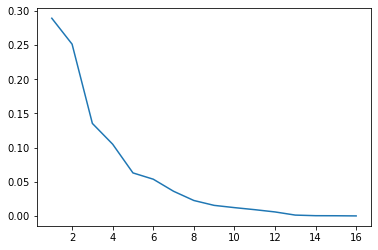

In [215]:
n =df_agg_num_cr.shape[0]                  # Nombre d'observations
p = df_agg_num_cr.shape[1]                  # nombre de variables                                   
plt.plot(np.arange(1,p+1),acp.explained_variance_ratio_) # Variance expliquée marginale : information capturée

<BarContainer object of 16 artists>

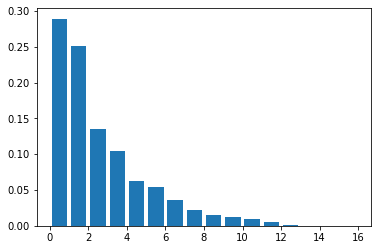

In [216]:
plt.bar(np.arange(len(acp.explained_variance_ratio_))+0.5,acp.explained_variance_ratio_)

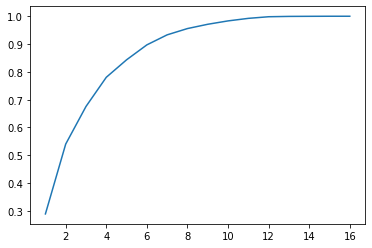

In [217]:
# Variance expliquée cumulée
plt.plot(np.arange(1,p+1), np.cumsum(acp.explained_variance_ratio_))

<BarContainer object of 16 artists>

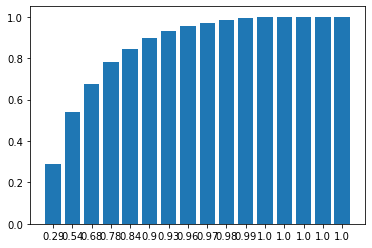

In [218]:
plt.bar(np.arange(len(acp.explained_variance_ratio_))+0.5,
        np.cumsum(acp.explained_variance_ratio_), 
        tick_label=np.round(np.cumsum(acp.explained_variance_ratio_),2))

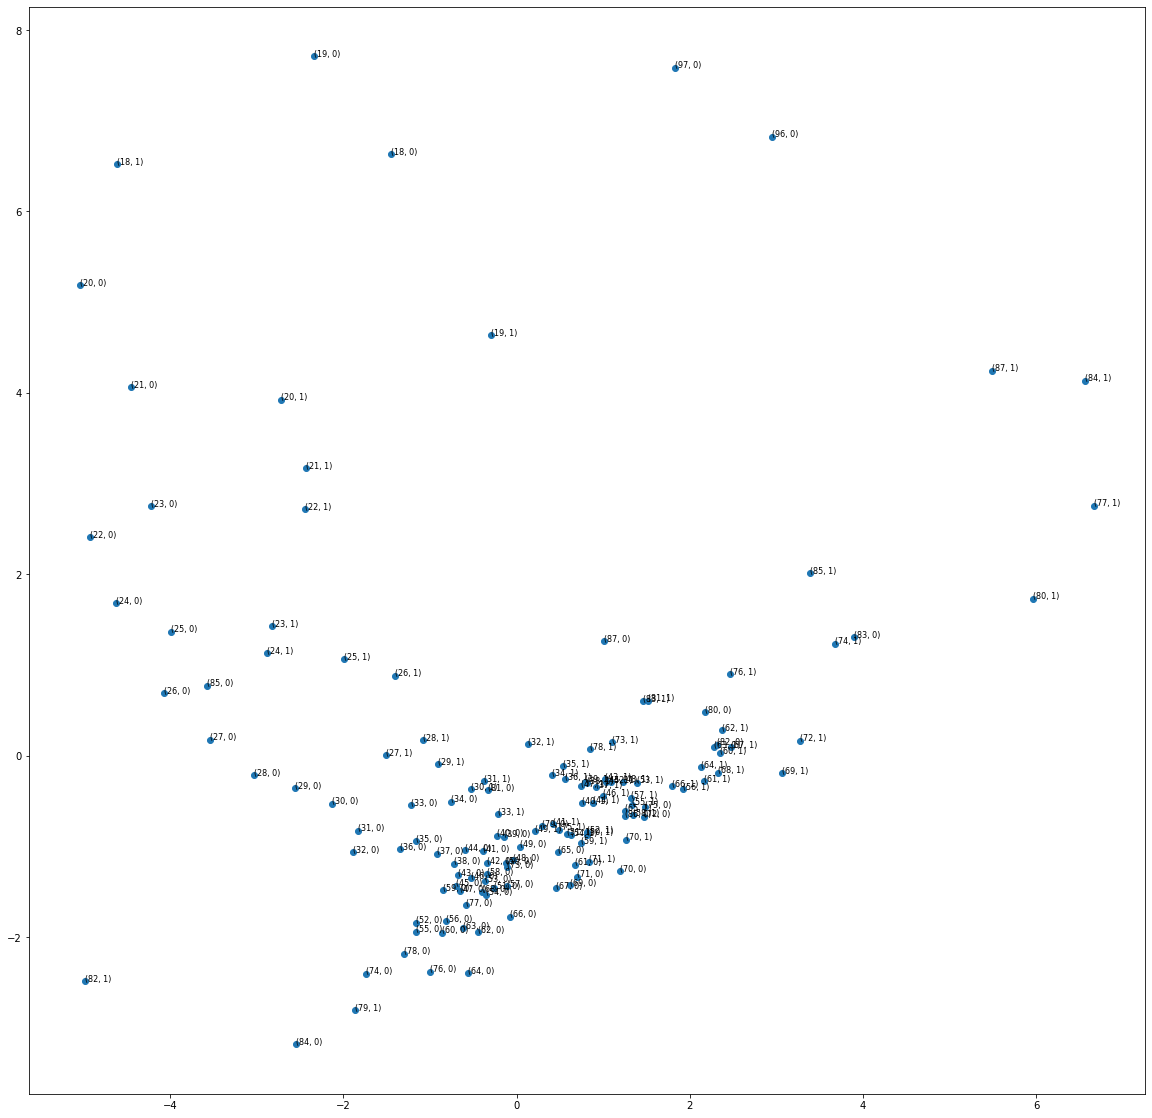

In [219]:
# Nuage de points des indvidus
fig = plt.figure(figsize=(20,20))
plt.scatter(res_acp[:, 0], res_acp[:, 1])
# Ajout des étiquettes
for i in range(0,len(res_acp[:,0])):
    plt.text(res_acp[i, 0],res_acp[i,1],agreg_df.index[i],fontsize=8)
fig.savefig('ACP.pdf')

In [220]:
# corrélation des variables avec les axes
var_cor = (n-1)/n*acp.explained_variance_  # Variance corrigée
corvar = np.zeros((p,p))
var_cor_rac = np.sqrt(var_cor)
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * var_cor_rac[k] #corr = vect pr. x val pr.
print(corvar)

[[-6.48568711e-01  5.51332417e-01  2.42568624e-02  2.38637552e-01
  -3.16266600e-01 -8.23617208e-03  1.25927538e-01  1.28825194e-01
   4.44820572e-02 -2.59332545e-01 -1.09195214e-01 -2.48053997e-02
  -5.94778255e-02 -2.38898733e-04 -5.01426885e-04 -1.24856412e-32]
 [-3.09565171e-01 -1.89218867e-01 -4.96343330e-01  2.93784633e-01
   2.74424937e-01 -5.26766770e-01  3.50943596e-01 -2.27825688e-01
   5.93329121e-02  1.75278454e-02 -5.09236551e-02  3.72824492e-02
  -5.47610223e-03 -4.07350974e-04  5.58185306e-04  4.75873992e-32]
 [-3.21959068e-01 -2.45021305e-01 -6.66979178e-01  1.75819866e-01
  -2.46730808e-01  4.25139492e-01  1.83529307e-01  1.58969109e-01
   1.19986184e-01  1.87883021e-01 -5.84753932e-02  8.26665562e-02
  -2.65157153e-03 -1.25797182e-04 -1.52125206e-03  1.46182611e-17]
 [-1.04660969e-01  1.22596425e-01  6.94566573e-01  4.88526312e-01
   1.27376313e-01 -3.14488402e-01 -1.60844587e-01  2.40570166e-01
   1.23621774e-01  1.64652763e-01 -1.02160854e-01  3.48887504e-02
  -2.52

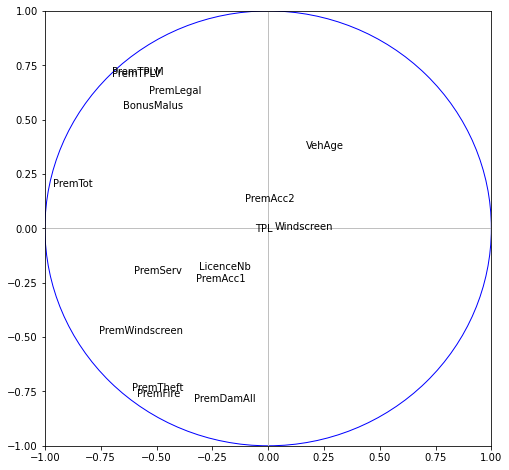

In [221]:
# Cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.annotate(agreg_df.columns[j],(corvar[j,0],corvar[j,1]))
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()

In [222]:
df = pd.DataFrame({'comp1' : res_acp[:, 0],'comp2' : res_acp[:, 1],
                   'BonusMalus': agreg_df.BonusMalus });df

comp1     comp2  BonusMalus
DrivAge Cat_sexe                                
18      0        -1.451823  6.631420   89.277778
        1        -4.618514  6.518473   78.500000
19      0        -2.337525  7.712949   93.852941
        1        -0.294426  4.632999   88.764706
20      0        -5.045102  5.185041   87.555556
...                    ...       ...         ...
86      0         1.245619 -0.663201   53.571429
87      0         1.008385  1.260456   62.500000
        1         5.486132  4.246152   50.000000
96      0         2.941795  6.822619   50.000000
97      0         1.826422  7.584602   50.000000

[141 rows x 3 columns]

In [223]:
base=prem_freq_sev_merge.copy()

In [224]:
def gravité(base):
  if base['nb_sin'] == 1:
    return 'no_sinitre'
  else:
    return 'sinistre'

In [225]:
base['nb_sin'] = base.apply(gravité, axis = 1 )

In [226]:
base['nb_sin'] = base.apply(lambda x: 1 if x['nb_sin']=='no_sinitre' else 0, axis = 1 )

In [227]:

X = base.drop('nb_sin', axis=1)
y = base['nb_sin']

In [228]:
y.value_counts()

1    8045
0    7942
Name: nb_sin, dtype: int64

In [229]:
del X['DrivGender'],X['IDpol'],X['PayFreq'],X['VehClass'],X['VehPower'],X['VehGas'],X['VehUsage'],X['Garage'],X['Region'],X['Marketing'],X['Area'],X['Guarantee'], X['IDclaim'],X['OccurDate'],X['Payment']

In [230]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [231]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)


In [232]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15), dpi=1000)
tree.plot_tree(clf, filled = True,feature_names = X_train.columns, class_names=['1','0'],rounded=True)

[Text(0.6363636363636364, 0.9, 'TPL <= 0.5\ngini = 0.5\nsamples = 12789\nvalue = [6395, 6394]\nclass = 1'),
 Text(0.36363636363636365, 0.7, 'Windscreen <= 0.5\ngini = 0.477\nsamples = 8179\nvalue = [3214, 4965]\nclass = 0'),
 Text(0.18181818181818182, 0.5, 'Damage <= 0.5\ngini = 0.358\nsamples = 5093\nvalue = [1188, 3905]\nclass = 0'),
 Text(0.09090909090909091, 0.3, 'Theft <= 0.5\ngini = 0.287\nsamples = 4334\nvalue = [754, 3580]\nclass = 0'),
 Text(0.045454545454545456, 0.1, 'gini = 0.222\nsamples = 3875\nvalue = [492, 3383]\nclass = 0'),
 Text(0.13636363636363635, 0.1, 'gini = 0.49\nsamples = 459\nvalue = [262, 197]\nclass = 1'),
 Text(0.2727272727272727, 0.3, 'PremDamAll <= 67.5\ngini = 0.49\nsamples = 759\nvalue = [434, 325]\nclass = 1'),
 Text(0.22727272727272727, 0.1, 'gini = 0.385\nsamples = 119\nvalue = [31, 88]\nclass = 0'),
 Text(0.3181818181818182, 0.1, 'gini = 0.466\nsamples = 640\nvalue = [403, 237]\nclass = 1'),
 Text(0.5454545454545454, 0.5, 'PremWindscreen <= 5.5\ngini

In [233]:
ypred = clf.predict(X_test)

In [234]:
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)

print('Score: ', score)

Score:  0.725140712945591


In [235]:
mc = confusion_matrix(y_test,ypred)
print (classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.66      0.91      0.76      1547
           1       0.86      0.56      0.68      1651

    accuracy                           0.73      3198
   macro avg       0.76      0.73      0.72      3198
weighted avg       0.76      0.73      0.72      3198



C:\Users\Diop\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


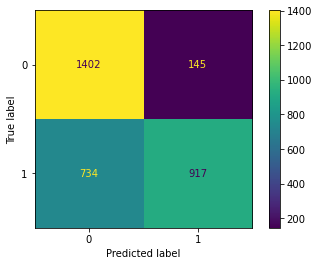

In [236]:
plot_confusion_matrix(clf, X_test, y_test)  #matrice de confusion
plt.show()

In [237]:
BaggingTree = BaggingClassifier(DecisionTreeClassifier(), n_estimators = 100)

In [238]:
BaggingTree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [239]:
prediction_BT = BaggingTree.predict(X_test)


In [240]:
mc = confusion_matrix(y_test,prediction_BT)
print (classification_report(y_test, prediction_BT))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1547
           1       0.93      0.79      0.86      1651

    accuracy                           0.86      3198
   macro avg       0.87      0.87      0.86      3198
weighted avg       0.87      0.86      0.86      3198



C:\Users\Diop\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


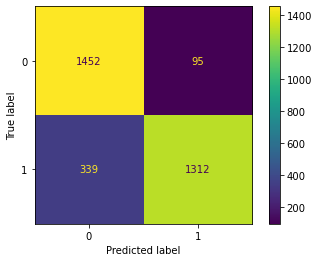

In [241]:
plot_confusion_matrix(BaggingTree, X_test, y_test)  
plt.show()

In [266]:
## Appliquons le modèle Random Forest

rf = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_leaf=1, min_samples_split=2)

rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)

print('Score: ', score)

Score:  0.8636647904940588


In [267]:
### Matrice de confusion du modèle RF
prediction_rf = rf.predict(X_test)

mc = confusion_matrix(y_test,prediction_rf)
print (classification_report(y_test, prediction_rf))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1547
           1       0.93      0.79      0.86      1651

    accuracy                           0.86      3198
   macro avg       0.87      0.87      0.86      3198
weighted avg       0.87      0.86      0.86      3198



C:\Users\Diop\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


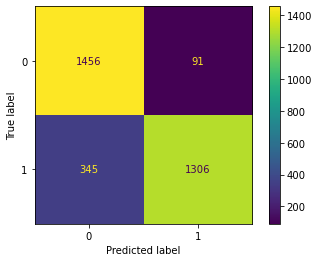

In [268]:
### Matrice de confusion du modèle RF en figure

plot_confusion_matrix(rf, X_test, y_test)  
plt.show()

In [256]:
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=3, random_state=0).fit(X_train, y_train)
GBC.score(X_test, y_test)

0.7542213883677298

In [257]:
predict_GBC = GBC.predict(X_test)
mc_GBC = confusion_matrix(y_test,predict_GBC)
print (classification_report(y_test, predict_GBC))

              precision    recall  f1-score   support

           0       0.72      0.79      0.76      1547
           1       0.79      0.72      0.75      1651

    accuracy                           0.75      3198
   macro avg       0.76      0.76      0.75      3198
weighted avg       0.76      0.75      0.75      3198



C:\Users\Diop\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


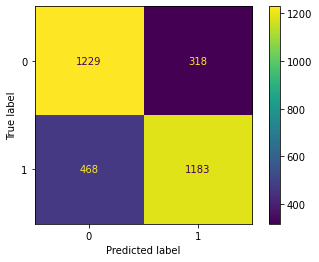

In [258]:
plot_confusion_matrix(GBC, X_test, y_test)  
plt.show()

In [260]:
# Evaluation des performances et choix du modèle
def taux_erreur(modele, y_test, X_test):
    y_pred = modele.predict(X_test)
    err = 1.0 - metrics.accuracy_score(y_test, y_pred)
    return err

In [261]:
print(taux_erreur(clf, y_test, X_test))

0.274859287054409


In [262]:
print(taux_erreur(BaggingTree, y_test, X_test))

0.13570981863664788


In [263]:
print(taux_erreur(rf, y_test, X_test))

0.1347717323327079


In [264]:
print(taux_erreur(GBC, y_test, X_test))

0.24577861163227022


In [249]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [250]:
mod_glm = smf.glm(formula = "nb_sin ~ Damage+Fire+Other+Theft+TPL+Windscreen+DrivAge+BonusMalus+LicenceNb+VehAge+PremWindscreen+PremDamAll+PremFire+PremAcc1+PremAcc2+PremLegal+PremTPLM+PremTPLV+PremServ+PremTheft+PremTot",
                  data = base,
                  family = sm.families.Poisson()).fit()

In [251]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 nb_sin   No. Observations:                15987
Model:                            GLM   Df Residuals:                    15966
Model Family:                 Poisson   Df Model:                           20
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12232.
Date:                Sun, 28 May 2023   Deviance:                       8374.6
Time:                        12:09:21   Pearson chi2:                 7.11e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1541
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.2290      0.184     -1.246      0.213      -0.589       0.131
Damage            -0.8666      0.051    -16.902      0.000      -0.967      -0.766
Fire              -0.4294      0.131     -3.280      0.001      -0.686      -0.173
Other             -0.6653      0.094     -7.078      0.000      -0.849      -0.481
Theft             -0.8972      0.064    -14.022      0.000      -1.023      -0.772
TPL               -0.9604      0.026    -36.551      0.000      -1.012      -0.909
Windscreen        -0.9930      0.030    -32.941      0.000      -1.052      -0.934
DrivAge            0.0008      0.001      0.748      0.455      -0.001       0.003
BonusMalus         0.0034      0.002      1.806      0.071      -0.000       0.007
LicenceNb         -0.0002      0.017     -0.011      0.991      -0.033       0.033
VehAge             0.0087      0.003      2.702      0.007       0.002       0.015
PremWindscreen    -0.0019      0.002     -1.114      0.265      -0.005       0.001
PremDamAll        -0.0005      0.001     -0.371      0.711      -0.003       0.002
PremFire          -0.0161      0.010     -1.595      0.111      -0.036       0.004
PremAcc1           0.0014      0.002      0.887      0.375      -0.002       0.004
PremAcc2          -0.0001      0.001     -0.072      0.943      -0.003       0.003
PremLegal          0.0140      0.010      1.467      0.142      -0.005       0.033
PremTPLM          -0.0019      0.002     -1.016      0.309      -0.006       0.002
PremTPLV           0.0086      0.006      1.385      0.166      -0.004       0.021
PremServ          -0.0034      0.003     -1.290      0.197      -0.009       0.002
PremTheft          0.0006      0.002      0.277      0.782      -0.004       0.005
PremTot            0.0006      0.001      0.456      0.648      -0.002       0.003
==================================================================================
"""

In [252]:
mod_glm.deviance/mod_glm.df_resid

0.5245254199253736

In [253]:
#reduction 
mod_glm = smf.glm(formula = "nb_sin ~DrivAge+LicenceNb+PremWindscreen+PremDamAll+PremFire+PremAcc1+PremAcc2+PremLegal+PremTPLM+PremTPLV+PremServ+PremTheft+PremTot",
                  data = base,
                  family = sm.families.Poisson()).fit()

In [254]:
mod_glm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 nb_sin   No. Observations:                15987
Model:                            GLM   Df Residuals:                    15974
Model Family:                 Poisson   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13544.
Date:                Sun, 28 May 2023   Deviance:                       10997.
Time:                        12:09:22   Pearson chi2:                 7.95e+03
No. Iterations:                     9   Pseudo R-squ. (CS):           0.003242
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.4918      0.134     -3.660      0.000      -0.755      -0.228
DrivAge            0.0006      0.001      0.592      0.554      -0.001       0.003
LicenceNb         -0.0139      0.017     -0.824      0.410      -0.047       0.019
PremWindscreen    -0.0004      0.001     -0.281      0.779      -0.003       0.002
PremDamAll         0.0015      0.001      1.242      0.214      -0.001       0.004
PremFire          -0.0193      0.010     -1.918      0.055      -0.039       0.000
PremAcc1           0.0038      0.001      2.786      0.005       0.001       0.007
PremAcc2           0.0016      0.001      1.273      0.203      -0.001       0.004
PremLegal         -0.0021      0.006     -0.332      0.740      -0.015       0.010
PremTPLM           0.0012      0.001      0.865      0.387      -0.002       0.004
PremTPLV           0.0108      0.006      1.801      0.072      -0.001       0.022
PremServ          -0.0012      0.002     -0.469      0.639      -0.006       0.004
PremTheft          0.0026      0.002      1.317      0.188      -0.001       0.007
PremTot           -0.0015      0.001     -1.261      0.207      -0.004       0.001
==================================================================================
"""

In [255]:
from scipy import stats
pvalue = 1.0 - stats.chi2.cdf(x = mod_glm.pearson_chi2, df = mod_glm.df_resid)
pvalue

1.0